In [1]:
import pandas as pd
import numpy as np
import csv
from datetime import datetime
from lxml import html 
import requests
from bs4 import BeautifulSoup
import itertools
import requests
import json
from myfunctions import getting_all_info
from IPython.core.display import HTML
# Converting links to html tags
from tqdm import tqdm
def path_to_image_html(path):
    return '<img src="'+ path + '" width="60" >'
import os

In [2]:
import pickle
def save_object(obj, filename):
    with open(filename, 'wb') as outp:  # Overwrites any existing file.
        pickle.dump(obj, outp, pickle.HIGHEST_PROTOCOL)
save_object(df_total, 'all_info_37590_70126_V7_withincidencias.pkl')

NameError: name 'df_total' is not defined

In [2]:
import pickle
with open('all_info_37590_70126_V7_withincidencias.pkl', 'rb') as inp:
    df_total = pickle.load(inp)
df_total=df_total.reset_index()
del df_total['index']
df_total

,id,vehiclePurchaseId,status,make,model,price,priceBeforeDiscount,year,vehicleAddedDate,mainImageUrl,...,car_seniority,Model_Brand,driveType2,available,Adde_year,month,Month,Year_month,NºIncidencias,NºRepintadas
0,3913868a-ac32-48c6-b7d3-496c9ff60900,37590,2,Citroen,C3 AirCross,275000.0,0.0,2021,2021-10-21 15:01:26.913330600,https://dat-tr-prda-ops-vava.azureedge.net/car...,...,1,Citroen C3 AirCross,Front Wheel Drive,No,2021,10,October,October_2021,6,0
1,fd5dbf55-7efb-4a2f-a183-ffa7999452d8,37591,4,Ford,Fiesta,139000.0,0.0,2015,2021-11-02 12:35:56.806230300,https://dat-tr-prda-ops-vava.azureedge.net/car...,...,7,Ford Fiesta,Front Wheel Drive,No,2021,11,November,November_2021,8,1
2,d6fa506f-18ca-444c-af9a-4cdd104a91f3,37595,2,Hyundai,Tucson,279000.0,0.0,2018,2021-10-15 12:06:35.524360900,https://dat-tr-prda-ops-vava.azureedge.net/car...,...,4,Hyundai Tucson,Front Wheel Drive,No,2021,10,October,October_2021,15,0
3,e512584f-4d98-4320-a3cc-d68b126c836c,37600,4,Renault,Megane,202000.0,0.0,2019,2021-10-19 12:08:54.585851700,https://dat-tr-prda-ops-vava.azureedge.net/car...,...,3,Renault Megane,Front Wheel Drive,No,2021,10,October,October_2021,10,1
4,0b728ef5-1aa4-4d68-b863-fd2add77cd23,37607,4,Toyota,Corolla,232000.0,0.0,2017,2021-11-02 12:38:30.874044800,https://dat-tr-prda-ops-vava.azureedge.net/car...,...,5,Toyota Corolla,Front Wheel Drive,No,2021,11,November,November_2021,16,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9530,0bf673d9-81d4-4598-96fa-0fdb805e40bf,70070,4,Mercedes-Benz,C,636000.0,636000.0,2016,2022-03-21 11:01:22.724692000,https://dat-tr-prda-ops-vava.azureedge.net/car...,...,6,Mercedes-Benz C,Rear Wheel Drive,No,2022,3,March,March_2022,29,5
9531,683abf4e-f402-453e-86ae-73c1ab1ed060,70075,1,Renault,Megane,317000.0,317000.0,2016,2022-03-24 10:07:54.210158300,https://dat-tr-prda-ops-vava.azureedge.net/car...,...,6,Renault Megane,Front Wheel Drive,Yes,2022,3,March,March_2022,33,0
9532,375569ef-94ae-4f67-afca-1b831e5a3ea0,70079,4,Nissan,Qashqai,519000.0,519000.0,2020,2022-03-21 11:01:33.901758100,https://dat-tr-prda-ops-vava.azureedge.net/car...,...,2,Nissan Qashqai,Four Wheel Drive,No,2022,3,March,March_2022,11,0
9533,afcb7025-da77-4d85-b8b7-1a173eb22697,70081,1,Renault,Symbol,182000.0,182000.0,2015,2022-03-28 13:55:28.127024400,https://dat-tr-prda-ops-vava.azureedge.net/car...,...,7,Renault Symbol,Front Wheel Drive,Yes,2022,3,March,March_2022,39,5


In [3]:
df_total.price.mean()/35700

10.111110624428063

In [5]:
df_total.columns

Index(['id', 'vehiclePurchaseId', 'status', 'make', 'model', 'price',
       'priceBeforeDiscount', 'year', 'vehicleAddedDate', 'mainImageUrl',
       'plateNumber', 'mileage', 'transmission', 'transmissionName',
       'fuelType', 'driveType', 'generalComment', 'carFeaturesDescription',
       'bodyType', 'seatingCapacity', 'doorCount', 'trimLevel',
       'engineHorsePower', 'engineType', 'engineVolume', 'engineVolumeLiters',
       'engineNumber', 'vin', 'numberOfKeys', 'numberOfCD', 'color',
       'paintType', 'vatPercentage', 'locationCity', 'unavailable', 'date_x',
       'images', 'imagesExterior', 'imagesInterior', 'imagesImperfections',
       'marca', 'modelo', 'detalles', 'Fecha', 'actualMileage', 'Price',
       'Type of Fuel', 'almacen', 'imgcar', 'date_y', 'condittion_summary',
       'Mech_summary', 'Body type', 'Color', 'Number of doors', 'Fuel type',
       'Wheel drive', 'Transmission', 'Seating capacity', 'features2_summary',
       'carFeaturesCodes', 'tags', 'Yakı

In [77]:
print(df_total['engineHorsePower'].unique())
df_total['engineType'].unique()

[0]


array([''], dtype=object)

In [3]:
import pandas as pd
dfprrr = pd.DataFrame(
    {'columnas': ['price','year','mileage','transmission','Type of Fuel','driveType2','bodyType','seatingCapacity','doorCount','locationCity','Model_Brand','make', 'engineVolume','trimLevel','numberOfKeys', 'numberOfCD','NºIncidencias', 'NºRepintadas','paintType','color']
    })#
dfprrr

,columnas
0,price
1,year
2,mileage
3,transmission
4,Type of Fuel
5,driveType2
6,bodyType
7,seatingCapacity
8,doorCount
9,locationCity


In [8]:
df=df_total[['price','year','mileage','transmission','Type of Fuel','driveType2','bodyType','seatingCapacity','doorCount','locationCity','Model_Brand','make', 'engineVolume','trimLevel','numberOfKeys', 'numberOfCD','NºIncidencias', 'NºRepintadas','paintType','color']]
df

,price,year,mileage,transmission,Type of Fuel,driveType2,bodyType,seatingCapacity,doorCount,locationCity,Model_Brand,make,engineVolume,trimLevel,numberOfKeys,numberOfCD,NºIncidencias,NºRepintadas,paintType,color
0,275000.0,2021,14040,Automatic,Diesel,Front Wheel Drive,SUV,5,5,Ankara,Citroen C3 AirCross,Citroen,1500,1.5 Bluehdi Feel Eat6 120HP,2,0,6,0,Opak,Dark grey
1,139000.0,2015,66065,Manual,Gasoline,Front Wheel Drive,Hatchback,5,5,Ankara,Ford Fiesta,Ford,1200,1.25i Trend X Esp 82HP,2,1,8,1,NaN,White
2,279000.0,2018,32351,Manual,Gasoline,Front Wheel Drive,SUV,5,5,İstanbul,Hyundai Tucson,Hyundai,1600,1.6 Gdi 4x2 Style 132HP,2,1,15,0,Metalik,Other
3,202000.0,2019,17883,Manual,Gasoline,Front Wheel Drive,Sedan,5,5,İstanbul,Renault Megane,Renault,1300,Sedan 1.3 Tce Joy 140HP,2,1,10,1,Metalik,Other
4,232000.0,2017,62651,Automatic,Diesel,Front Wheel Drive,Sedan,5,4,Ankara,Toyota Corolla,Toyota,1400,1.4 D-4D Touch M/M 90HP,2,1,16,3,Opak,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9530,636000.0,2016,89333,Automatic,Gasoline,Rear Wheel Drive,Sedan,5,4,Ankara,Mercedes-Benz C,Mercedes-Benz,1595,180 Fascination 7G-Tronic 156HP,2,1,29,5,Metalik,Dark grey
9531,317000.0,2016,103655,Manual,Diesel,Front Wheel Drive,Hatchback,5,5,İstanbul,Renault Megane,Renault,1500,1.5 Dci Icon 110HP,2,1,33,0,Metalik,White
9532,519000.0,2020,36428,Automatic,Diesel,Four Wheel Drive,SUV,5,5,Ankara,Nissan Qashqai,Nissan,1500,1.5 Dci Sky Pack Dct 115HP,2,1,11,0,Metalik,Light grey
9533,182000.0,2015,81512,Manual,Gasoline,Front Wheel Drive,Sedan,5,5,Adana,Renault Symbol,Renault,1200,1.2 16v Joy 75HP,2,1,39,5,Opak,White


In [9]:
null_columns=df.columns[df.isnull().any()]#nomnbre de columna con nulos
null_columns

Index(['Type of Fuel', 'locationCity', 'paintType'], dtype='object')

In [87]:
df[df["transmission"].isnull()]#filas con nulos given a column

,price,year,mileage,transmission,Type of Fuel,driveType2,bodyType,seatingCapacity,doorCount,locationCity,Model_Brand,make,engineVolume,trimLevel,numberOfKeys,numberOfCD
4045,489000.0,2020,13507,NaN,Diesel,Front Wheel Drive,SUV,5,5,Ankara,Nissan Qashqai,Nissan,1500,1.5 Dci Tekna Dct 115HP,1,1
7871,200000.0,2018,51260,NaN,NaN,Front Wheel Drive,Sedan,5,4,Ankara,Fiat Egea,Fiat,1400,1.4 Fire Easy 95HP,2,1
7977,630000.0,2019,10781,NaN,Diesel,Front Wheel Drive,Sedan,5,4,Ankara,Peugeot 508,Peugeot,1500,1.5 Bluehdi Gt Line Eat8 130HP,2,1


In [ ]:
#relleno de nulos

In [88]:
NQ=df[df["Model_Brand"]=='Fiat Egea']#filas con nulos given a column
print(NQ[NQ['transmission']=='Manual']['price'].mean())
NQ[NQ['transmission']=='Automatic']['price'].mean()

238647.35099337748


281978.26086956525

In [89]:
(NQ[NQ['transmission']=='Automatic']['price'].min())

210000.0

In [100]:
df.at[7871, 'transmission'] = 'Manual'

In [91]:
NQ=df[df["Model_Brand"]=='Peugeot 508']#filas con nulos given a column
print(NQ[NQ['transmission']=='Manual']['price'].mean())
NQ[NQ['transmission']=='Automatic']['price'].mean()

nan


535120.0

In [92]:
NQ['transmission'].unique()

array(['Automatic', nan], dtype=object)

In [99]:
df.at[7977, 'transmission'] = 'Automatic'

In [94]:
NQ=df[df["Model_Brand"]=='Nissan Qashqai']#filas con nulos given a column
print(NQ[NQ['transmission']=='Manual']['price'].mean())
NQ[NQ['transmission']=='Automatic']['price'].mean()

328066.6666666667


424160.0

In [95]:
(NQ[NQ['transmission']=='Manual']['price'].max())

445000.0

In [98]:
df.at[4045,'transmission'] = 'Automatic'

In [351]:
null_columns=df.columns[df.isnull().any()]#nomnbre de columna con nulos
null_columns

Index(['Type of Fuel', 'locationCity', 'paintType'], dtype='object')

In [322]:
df[df["paintType"].isnull()]#filas con nulos given a column

,price,year,mileage,transmission,Type of Fuel,driveType2,bodyType,seatingCapacity,doorCount,locationCity,Model_Brand,make,engineVolume,trimLevel,numberOfKeys,numberOfCD,NºIncidencias,NºRepintadas,paintType,color
1,139000.0,2015,66065,Manual,Gasoline,Front Wheel Drive,Hatchback,5,5,Ankara,Ford Fiesta,Ford,1200,1.25i Trend X Esp 82HP,2,1,8,1,NaN,White
10,181000.0,2018,70178,Manual,Gasoline,Front Wheel Drive,Sedan,5,4,Ankara,Renault Megane,Renault,1600,Sedan 1.6 16v Joy 115HP,1,1,11,3,NaN,Black
14,368000.0,2019,24433,Automatic,Gasoline,Front Wheel Drive,SUV,5,5,Ankara,Peugeot 3008,Peugeot,1600,1.6 Thp Active Prime Edition Eat8 180HP,2,1,9,0,NaN,Light grey
28,210000.0,2016,100384,Automatic,Diesel,Front Wheel Drive,SUV,5,5,Ankara,Peugeot 2008,Peugeot,1560000,1.6 Bluehdi Start&Stop Active Etg6 100HP,2,1,19,0,NaN,Light grey
38,486000.0,2019,30849,Automatic,Gasoline,Four Wheel Drive,SUV,5,5,Ankara,Honda CR-V,Honda,1500,1.5 Vtec Executive 193HP 4x4,2,1,9,0,NaN,Red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9407,421000.0,2020,26890,Automatic,Gasoline,Front Wheel Drive,Sedan,5,4,İstanbul,Honda Civic,Honda,1600,Sedan 1.6 i-VTEC Eco Executive 125HP,1,1,9,0,NaN,Dark grey
9412,580000.0,2021,19951,Automatic,Gasoline,Four Wheel Drive,SUV,5,5,İstanbul,Subaru XV,Subaru,1600,1.6i Awd Xtreme Lineartronic 114HP,2,1,11,0,NaN,Light blue
9440,216000.0,2009,60101,Automatic,Gasoline,Front Wheel Drive,Sedan,5,4,İstanbul,Opel Astra,Opel,1600,Sedan 1.6 Enjoy Elegance Easytronic 115HP,2,1,32,0,NaN,Dark grey
9460,330000.0,2017,61812,Automatic,Gasoline,Front Wheel Drive,Hatchback,5,5,İstanbul,Volkswagen Polo,Volkswagen,1000,1.0 Tsi Highline Dsg 95HP,2,0,20,0,NaN,Light grey


In [12]:
df["paintType"]=df['paintType'].replace(np.NaN,'unknown')
df[df["paintType"].isnull()]#filas con nulos given a column

<ipython-input-12-46e2f8fccbda>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["paintType"]=df['paintType'].replace(np.NaN,'unknown')


,price,year,mileage,transmission,Type of Fuel,driveType2,bodyType,seatingCapacity,doorCount,locationCity,Model_Brand,make,engineVolume,trimLevel,numberOfKeys,numberOfCD,NºIncidencias,NºRepintadas,paintType,color


In [120]:
df[df["locationCity"].isnull()]#filas con nulos given a column

,price,year,mileage,transmission,Type of Fuel,driveType2,bodyType,seatingCapacity,doorCount,locationCity,Model_Brand,make,engineVolume,trimLevel,numberOfKeys,numberOfCD
5361,248000.0,2017,34704,Manual,Gasoline,Front Wheel Drive,Sedan,5,4,NaN,Opel Astra,Opel,1600,Sedan 1.6 Edition Plus 115HP,2,1
7303,278000.0,2016,37546,Automatic,Gasoline,Front Wheel Drive,Hatchback,5,5,NaN,Hyundai I20,Hyundai,1400,1.4 Mpi Elite Smart 100HP,2,1
7340,626000.0,2018,88811,Automatic,Gasoline,Front Wheel Drive,SUV,5,5,NaN,Volkswagen Tiguan AllSpace,Volkswagen,1400,1.4 Tsi Act Bmt Highline Dsg 150HP,2,1
8305,291000.0,2018,60694,Manual,Gasoline,Front Wheel Drive,Sedan,5,4,NaN,Hyundai Elantra,Hyundai,1600,1.6 D-CVVT Style 127HP,2,1
8801,563000.0,2020,9532,Automatic,Gasoline,Front Wheel Drive,Hatchback,5,5,NaN,Mini Cooper,Mini,1500,1.5 Signature 136HP 5 Kapı,2,1


In [13]:
df["locationCity"]=df['locationCity'].replace(np.NaN,'unknown')
df[df["locationCity"].isnull()]#filas con nulos given a column

<ipython-input-13-20ced661d130>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["locationCity"]=df['locationCity'].replace(np.NaN,'unknown')


,price,year,mileage,transmission,Type of Fuel,driveType2,bodyType,seatingCapacity,doorCount,locationCity,Model_Brand,make,engineVolume,trimLevel,numberOfKeys,numberOfCD,NºIncidencias,NºRepintadas,paintType,color


In [14]:
null_columns=df.columns[df.isnull().any()]#nomnbre de columna con nulos
null_columns

Index(['Type of Fuel'], dtype='object')

In [183]:
df.to_csv("df_precio1.csv",index=False)

In [191]:
df[df['Type of Fuel'].isnull()]

,price,year,mileage,transmission,Type of Fuel,driveType2,bodyType,seatingCapacity,doorCount,locationCity,Model_Brand,make,engineVolume,trimLevel,numberOfKeys,numberOfCD,NºIncidencias,NºRepintadas
2394,350000.0,2020,4594,Automatic,NaN,Front Wheel Drive,Sedan,5,5,İstanbul,Hyundai Elantra,Hyundai,1600,1.6 Mpi Style Plus 127HP,2,1,1,0
2622,336000.0,2020,7270,Automatic,NaN,Front Wheel Drive,Hatchback,5,5,İstanbul,Toyota Yaris,Toyota,1500,1.5 Flame Multidrive S 125HP,2,1,1,0
2819,300000.0,2016,49702,Automatic,NaN,Front Wheel Drive,Hatchback,5,5,Ankara,Volkswagen Polo,Volkswagen,1200,1.2 Tsi Bmt Comfortline Dsg 90HP,2,1,10,0
3179,745000.0,2020,53065,Automatic,NaN,Front Wheel Drive,Sedan,5,4,İstanbul,Volkswagen Passat,Volkswagen,1600,1.6 Tdi Bmt Elegance Dsg 120HP,2,1,31,2
3278,656000.0,2018,58992,Automatic,NaN,Rear Wheel Drive,Sedan,5,4,İstanbul,Mercedes-Benz C,Mercedes-Benz,1600,200 D Bluetec Comfort 7G-Tronic 136HP,2,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9449,600000.0,2020,26536,Automatic,NaN,Front Wheel Drive,SUV,5,5,Ankara,Nissan Qashqai,Nissan,1500,1.5 Dci UEFA Champions League Edition Dct 115HP,2,1,16,1
9479,652000.0,2015,119932,Automatic,NaN,Rear Wheel Drive,Sedan,5,4,Ankara,Mercedes-Benz C,Mercedes-Benz,1600,180 Exclusive 7G-Tronic 156HP,2,1,37,1
9493,399000.0,2018,43117,Manual,NaN,Front Wheel Drive,SUV,5,5,Ankara,Nissan Qashqai,Nissan,1500,1.5 Dci Start&Stop Tekna 110HP,2,1,21,1
9511,258000.0,2016,138156,Manual,NaN,Front Wheel Drive,Hatchback,5,5,Ankara,Seat Leon,Seat,1200,1.2 Tsi Start&Stop Style 110HP,2,1,29,0


In [15]:
df[df['transmission']=='Automatic']["Type of Fuel"]#& (df['doorCount']!=5)
df[(df['bodyType']=='MPV')].groupby(['Type of Fuel']).count()

,price,year,mileage,transmission,driveType2,bodyType,seatingCapacity,doorCount,locationCity,Model_Brand,make,engineVolume,trimLevel,numberOfKeys,numberOfCD,NºIncidencias,NºRepintadas,paintType,color
Type of Fuel,,,,,,,,,,,,,,,,,,,
Diesel,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62
Gasoline,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13


In [16]:
dfnulo=df[df['Type of Fuel'].isnull()]
print(len(dfnulo[dfnulo['bodyType']=='MPV']))
for i in dfnulo[dfnulo['bodyType']=='MPV'].index.tolist():
    df.at[i,'Type of Fuel'] = 'Diesel'

1


In [17]:
df[df['transmission']=='Automatic']["Type of Fuel"]#& (df['doorCount']!=5)
df[(df['bodyType']=='Crossover')].groupby(['Type of Fuel']).count()

,price,year,mileage,transmission,driveType2,bodyType,seatingCapacity,doorCount,locationCity,Model_Brand,make,engineVolume,trimLevel,numberOfKeys,numberOfCD,NºIncidencias,NºRepintadas,paintType,color
Type of Fuel,,,,,,,,,,,,,,,,,,,
Diesel,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Gasoline,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7


In [18]:
dfnulo=df[df['Type of Fuel'].isnull()]
print(len(dfnulo[dfnulo['bodyType']=='Crossover']))
for i in dfnulo[dfnulo['bodyType']=='Crossover'].index.tolist():
    df.at[i,'Type of Fuel'] = 'Gasoline'

1


In [19]:
df[df['transmission']=='Automatic']["Type of Fuel"]#& (df['doorCount']!=5)
df[(df['bodyType']=='Coupe')].groupby(['Type of Fuel']).count()

,price,year,mileage,transmission,driveType2,bodyType,seatingCapacity,doorCount,locationCity,Model_Brand,make,engineVolume,trimLevel,numberOfKeys,numberOfCD,NºIncidencias,NºRepintadas,paintType,color
Type of Fuel,,,,,,,,,,,,,,,,,,,
Diesel,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28
Gasoline,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84


In [20]:
dfnulo=df[df['Type of Fuel'].isnull()]
print(len(dfnulo[dfnulo['bodyType']=='Coupe']))
for i in dfnulo[dfnulo['bodyType']=='Coupe'].index.tolist():
    df.at[i,'Type of Fuel'] = 'Gasoline'

2


In [21]:
#df[df['transmission']=='Automatic']["Type of Fuel"]#& (df['doorCount']!=5)
df[(df['year']<=2010)].groupby(['Type of Fuel']).count()

,price,year,mileage,transmission,driveType2,bodyType,seatingCapacity,doorCount,locationCity,Model_Brand,make,engineVolume,trimLevel,numberOfKeys,numberOfCD,NºIncidencias,NºRepintadas,paintType,color
Type of Fuel,,,,,,,,,,,,,,,,,,,
Diesel,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Gasoline,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26


In [22]:
dfnulo=df[df['Type of Fuel'].isnull()]
print(len(dfnulo[dfnulo['year']==2010]))
for i in dfnulo[dfnulo['year']==2010].index.tolist():
    df.at[i,'Type of Fuel'] = 'Gasoline'

1


In [23]:
dfnulo=df[df['Type of Fuel'].isnull()]
len(dfnulo)

134

In [24]:
df["Type of Fuel"]=df['Type of Fuel'].replace(np.NaN,'unknown')
df1=df
print(len(df1))
df1.head()

9535


<ipython-input-24-663a1c3197f3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Type of Fuel"]=df['Type of Fuel'].replace(np.NaN,'unknown')


,price,year,mileage,transmission,Type of Fuel,driveType2,bodyType,seatingCapacity,doorCount,locationCity,Model_Brand,make,engineVolume,trimLevel,numberOfKeys,numberOfCD,NºIncidencias,NºRepintadas,paintType,color
0,275000.0,2021,14040,Automatic,Diesel,Front Wheel Drive,SUV,5,5,Ankara,Citroen C3 AirCross,Citroen,1500,1.5 Bluehdi Feel Eat6 120HP,2,0,6,0,Opak,Dark grey
1,139000.0,2015,66065,Manual,Gasoline,Front Wheel Drive,Hatchback,5,5,Ankara,Ford Fiesta,Ford,1200,1.25i Trend X Esp 82HP,2,1,8,1,unknown,White
2,279000.0,2018,32351,Manual,Gasoline,Front Wheel Drive,SUV,5,5,İstanbul,Hyundai Tucson,Hyundai,1600,1.6 Gdi 4x2 Style 132HP,2,1,15,0,Metalik,Other
3,202000.0,2019,17883,Manual,Gasoline,Front Wheel Drive,Sedan,5,5,İstanbul,Renault Megane,Renault,1300,Sedan 1.3 Tce Joy 140HP,2,1,10,1,Metalik,Other
4,232000.0,2017,62651,Automatic,Diesel,Front Wheel Drive,Sedan,5,4,Ankara,Toyota Corolla,Toyota,1400,1.4 D-4D Touch M/M 90HP,2,1,16,3,Opak,White


In [365]:
# list the data types for each column
print(df1.dtypes)

price              float64
year                 int64
mileage              int64
transmission        object
Type of Fuel        object
driveType2          object
bodyType            object
seatingCapacity      int64
doorCount            int64
locationCity        object
Model_Brand         object
make                object
engineVolume         int64
trimLevel           object
numberOfKeys         int64
numberOfCD           int64
NºIncidencias        int64
NºRepintadas         int64
paintType           object
color               object
dtype: object


### procedemos ahora a quitar outliers y demas ruido en nuestros datos

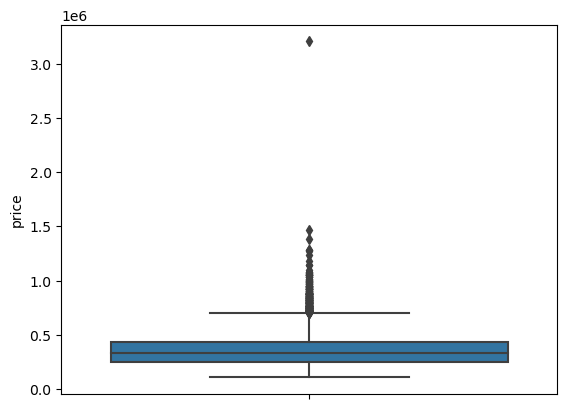

In [7]:
# figure size in inches
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

sns.boxplot(y="price", data=df_total)
plt.show()

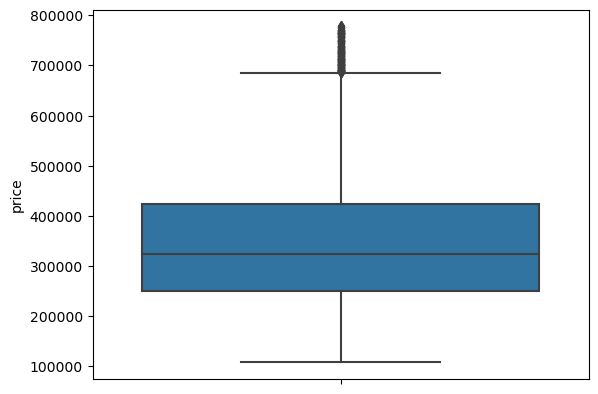

In [34]:
# figure size in inches
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

sns.boxplot(y="price", data=df1.iloc[sin_outs])
plt.show()

In [29]:
arr1=[df1['price']]
#arr1=np.array(arr1)[df1['price'].astype(int)]
# finding the 1st quartile
q1 = np.quantile(arr1, 0.25)
 
# finding the 3rd quartile
q3 = np.quantile(arr1, 0.75)
med = np.median(arr1)
 
# finding the iqr region
iqr = q3-q1
 
# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(iqr, upper_bound, lower_bound)

181000.0 703500.0 -20500.0


In [632]:
type(df1['price'])

pandas.core.series.Series

In [30]:
def box_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    mask = (series < Q1 - 1.5 * IQR) | (series > Q3 + 1.5 * IQR)
    series = series[mask]
    return series
box_outliers(df1['price'])

185     749000.0
250     919000.0
287     770000.0
405     789000.0
461     887000.0
          ...   
9169    725000.0
9193    728000.0
9213    800000.0
9279    794000.0
9443    819000.0
Name: price, Length: 298, dtype: float64

In [31]:
outs=box_outliers(df1['price']).sort_values().tail(180).index.tolist()
sin_outs=[]
for i in df1.index.tolist():
    if i not in outs:
        sin_outs.append(i)



In [32]:
dfnout=df1.iloc[sin_outs]

In [769]:
del dfnout['mileage_norm']

In [760]:
#dfnout['incidencias_totales']=dfnout['NºIncidencias']+dfnout['NºRepintadas']
dfnout

,price,year,mileage,transmission,Type of Fuel,driveType2,bodyType,seatingCapacity,doorCount,locationCity,...,trimLevel,numberOfKeys,numberOfCD,NºIncidencias,NºRepintadas,paintType,color,mileage_norm,mileage_binned,incidencias_totales
0,275000.0,2021,14040,Automatic,Diesel,Front Wheel Drive,SUV,5,5,Ankara,...,1.5 Bluehdi Feel Eat6 120HP,2,0,6,0,Opaque,Dark grey,0.012610,Deep_Low,6
1,139000.0,2015,66065,Manual,Gasoline,Front Wheel Drive,Hatchback,5,5,Ankara,...,1.25i Trend X Esp 82HP,2,1,8,1,unknown,White,0.059338,Medium_Low,9
2,279000.0,2018,32351,Manual,Gasoline,Front Wheel Drive,SUV,5,5,İstanbul,...,1.6 Gdi 4x2 Style 132HP,2,1,15,0,Metalic,Other,0.029057,Low,15
3,202000.0,2019,17883,Manual,Gasoline,Front Wheel Drive,Sedan,5,5,İstanbul,...,Sedan 1.3 Tce Joy 140HP,2,1,10,1,Metalic,Other,0.016062,Deep_Low,11
4,232000.0,2017,62651,Automatic,Diesel,Front Wheel Drive,Sedan,5,4,Ankara,...,1.4 D-4D Touch M/M 90HP,2,1,16,3,Opaque,White,0.056272,Medium_Low,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9530,636000.0,2016,89333,Automatic,Gasoline,Rear Wheel Drive,Sedan,5,4,Ankara,...,180 Fascination 7G-Tronic 156HP,2,1,29,5,Metalic,Dark grey,0.080237,Medium,34
9531,317000.0,2016,103655,Manual,Diesel,Front Wheel Drive,Hatchback,5,5,İstanbul,...,1.5 Dci Icon 110HP,2,1,33,0,Metalic,White,0.093100,Medium_High,33
9532,519000.0,2020,36428,Automatic,Diesel,Four Wheel Drive,SUV,5,5,Ankara,...,1.5 Dci Sky Pack Dct 115HP,2,1,11,0,Metalic,Light grey,0.032719,Low,11
9533,182000.0,2015,81512,Manual,Gasoline,Front Wheel Drive,Sedan,5,5,Adana,...,1.2 16v Joy 75HP,2,1,39,5,Opaque,White,0.073212,Medium,44


In [35]:
dfnout.corr()

,price,year,mileage,seatingCapacity,doorCount,engineVolume,numberOfKeys,numberOfCD,NºIncidencias,NºRepintadas
price,1.000000,0.271154,-0.168922,0.012148,-0.034914,0.005416,0.068112,-0.012914,-0.183403,-0.221399
year,0.271154,1.000000,-0.693047,0.045614,0.037992,0.001303,-0.018506,-0.032619,-0.644331,-0.424387
mileage,-0.168922,-0.693047,1.000000,-0.014680,-0.114327,0.003512,-0.046022,0.026667,0.621979,0.393493
seatingCapacity,0.012148,0.045614,-0.014680,1.000000,0.136199,0.000481,-0.059584,-0.001476,-0.031487,-0.012950
doorCount,-0.034914,0.037992,-0.114327,0.136199,1.000000,-0.000799,0.001701,-0.041873,-0.018587,-0.074962
engineVolume,0.005416,0.001303,0.003512,0.000481,-0.000799,1.000000,-0.003100,0.005630,-0.011784,-0.008227
numberOfKeys,0.068112,-0.018506,-0.046022,-0.059584,0.001701,-0.003100,1.000000,0.227840,-0.023259,-0.058899
numberOfCD,-0.012914,-0.032619,0.026667,-0.001476,-0.041873,0.005630,0.227840,1.000000,-0.011940,0.004447
NºIncidencias,-0.183403,-0.644331,0.621979,-0.031487,-0.018587,-0.011784,-0.023259,-0.011940,1.000000,0.371716
NºRepintadas,-0.221399,-0.424387,0.393493,-0.012950,-0.074962,-0.008227,-0.058899,0.004447,0.371716,1.000000


In [36]:
c = df1.iloc[sin_outs].corr().abs()

s = c.unstack()
so = s.sort_values(kind="quicksort")
so[-20:-10]

mileage        NºRepintadas     0.393493
NºRepintadas   mileage          0.393493
year           NºRepintadas     0.424387
NºRepintadas   year             0.424387
mileage        NºIncidencias    0.621979
NºIncidencias  mileage          0.621979
year           NºIncidencias    0.644331
NºIncidencias  year             0.644331
year           mileage          0.693047
mileage        year             0.693047
dtype: float64

In [37]:
# Write your code below and press Shift+Enter to execute 
df1.iloc[sin_outs][['year','mileage','NºIncidencias','NºRepintadas']].corr()

,year,mileage,NºIncidencias,NºRepintadas
year,1.000000,-0.693047,-0.644331,-0.424387
mileage,-0.693047,1.000000,0.621979,0.393493
NºIncidencias,-0.644331,0.621979,1.000000,0.371716
NºRepintadas,-0.424387,0.393493,0.371716,1.000000


(0.0, 811500.0)

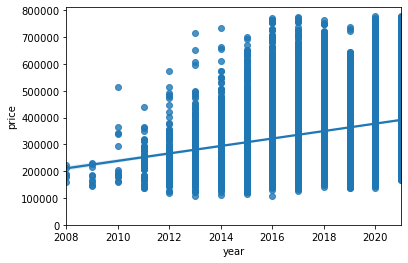

In [38]:
# Engine size as potential predictor variable of price
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
sns.regplot(x="year", y="price", data=df1.iloc[sin_outs])
plt.ylim(0,)

In [39]:
df1.iloc[sin_outs][["year", "price"]].corr()

,year,price
year,1.000000,0.271154
price,0.271154,1.000000


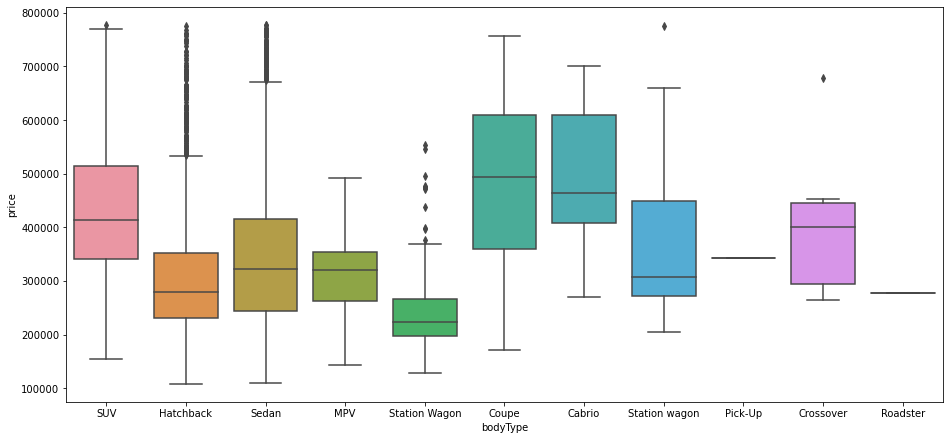

In [40]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 15.7,7.27
sns.boxplot(x="bodyType", y="price", data=df1.iloc[sin_outs])

In [ ]:
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

In [41]:
dfnout[dfnout['Model_Brand']=="Fiat Egea"]

,price,year,mileage,transmission,Type of Fuel,driveType2,bodyType,seatingCapacity,doorCount,locationCity,Model_Brand,make,engineVolume,trimLevel,numberOfKeys,numberOfCD,NºIncidencias,NºRepintadas,paintType,color
29,397000.0,2021,117671,Manual,Diesel,Rear Wheel Drive,Sedan,5,4,İstanbul,Fiat Egea,Fiat,1600,1.3 Multijet II Urban 95HP,1,1,34,6,Opak,White
79,172000.0,2016,98028,Manual,Diesel,Front Wheel Drive,Sedan,5,4,İstanbul,Fiat Egea,Fiat,0,1.6 Multijet Lounge 120HP,2,1,24,0,Metalik,White
80,217000.0,2020,23375,Automatic,Diesel,Front Wheel Drive,Hatchback,5,5,İstanbul,Fiat Egea,Fiat,1600,1.6 16v Multijet II Start&Stop Street Dct 120HP,2,1,5,0,Metalik,Dark grey
81,237000.0,2020,11312,Automatic,Diesel,Front Wheel Drive,Hatchback,5,5,İstanbul,Fiat Egea,Fiat,1600,1.6 16v Multijet II Start&Stop Street Dct 120HP,1,1,7,0,Metalik,Dark grey
163,160000.0,2020,11070,Manual,Gasoline,Front Wheel Drive,Sedan,5,4,İstanbul,Fiat Egea,Fiat,0,1.4 Fire Urban Plus 95HP,2,1,8,4,Opak,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9429,217000.0,2019,12237,Manual,Gasoline,Front Wheel Drive,Sedan,5,4,Ankara,Fiat Egea,Fiat,1400,1.4 Fire Easy 95HP,2,1,1,0,Opak,White
9482,285000.0,2021,5929,Manual,Gasoline,Front Wheel Drive,Crossover,5,5,Ankara,Fiat Egea,Fiat,1400,1.4 Fire Urban 95HP,2,1,6,0,Metalik,Turuncu
9496,234000.0,2020,31063,Manual,Gasoline,Front Wheel Drive,Hatchback,5,5,Adana,Fiat Egea,Fiat,1400,1.4 16v Fire Street 95HP,2,1,29,2,Metalik,Red
9504,321000.0,2021,18914,Manual,Gasoline,Front Wheel Drive,Crossover,5,5,Ankara,Fiat Egea,Fiat,1400,1.4 Fire Lounge 95HP,2,1,10,0,Metalik,Dark blue


In [43]:
dfnout[dfnout['Model_Brand']=="Fiat Egea"]

,price,year,mileage,transmission,Type of Fuel,driveType2,bodyType,seatingCapacity,doorCount,locationCity,Model_Brand,make,engineVolume,trimLevel,numberOfKeys,numberOfCD,NºIncidencias,NºRepintadas,paintType,color
29,397000.0,2021,117671,Manual,Diesel,Rear Wheel Drive,Sedan,5,4,İstanbul,Fiat Egea,Fiat,1600,1.3 Multijet II Urban 95HP,1,1,34,6,Opak,White
79,172000.0,2016,98028,Manual,Diesel,Front Wheel Drive,Sedan,5,4,İstanbul,Fiat Egea,Fiat,0,1.6 Multijet Lounge 120HP,2,1,24,0,Metalik,White
80,217000.0,2020,23375,Automatic,Diesel,Front Wheel Drive,Hatchback,5,5,İstanbul,Fiat Egea,Fiat,1600,1.6 16v Multijet II Start&Stop Street Dct 120HP,2,1,5,0,Metalik,Dark grey
81,237000.0,2020,11312,Automatic,Diesel,Front Wheel Drive,Hatchback,5,5,İstanbul,Fiat Egea,Fiat,1600,1.6 16v Multijet II Start&Stop Street Dct 120HP,1,1,7,0,Metalik,Dark grey
163,160000.0,2020,11070,Manual,Gasoline,Front Wheel Drive,Sedan,5,4,İstanbul,Fiat Egea,Fiat,0,1.4 Fire Urban Plus 95HP,2,1,8,4,Opak,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9429,217000.0,2019,12237,Manual,Gasoline,Front Wheel Drive,Sedan,5,4,Ankara,Fiat Egea,Fiat,1400,1.4 Fire Easy 95HP,2,1,1,0,Opak,White
9482,285000.0,2021,5929,Manual,Gasoline,Front Wheel Drive,Crossover,5,5,Ankara,Fiat Egea,Fiat,1400,1.4 Fire Urban 95HP,2,1,6,0,Metalik,Turuncu
9496,234000.0,2020,31063,Manual,Gasoline,Front Wheel Drive,Hatchback,5,5,Adana,Fiat Egea,Fiat,1400,1.4 16v Fire Street 95HP,2,1,29,2,Metalik,Red
9504,321000.0,2021,18914,Manual,Gasoline,Front Wheel Drive,Crossover,5,5,Ankara,Fiat Egea,Fiat,1400,1.4 Fire Lounge 95HP,2,1,10,0,Metalik,Dark blue


In [244]:
for i in [423,845,904,941,955,1007,1126,2306,671,4870]:
    df1.at[i,'bodyType'] = 'Sedan'

In [245]:
for i in [8129,4619]:
    df1.at[i,'bodyType'] = 'Hatchback'
for i in [3687,]:
    df1.at[i,'bodyType'] = 'Station wagon'

In [246]:
for i in [2564,2731]:
    df1.at[i,'bodyType'] = 'SUV'

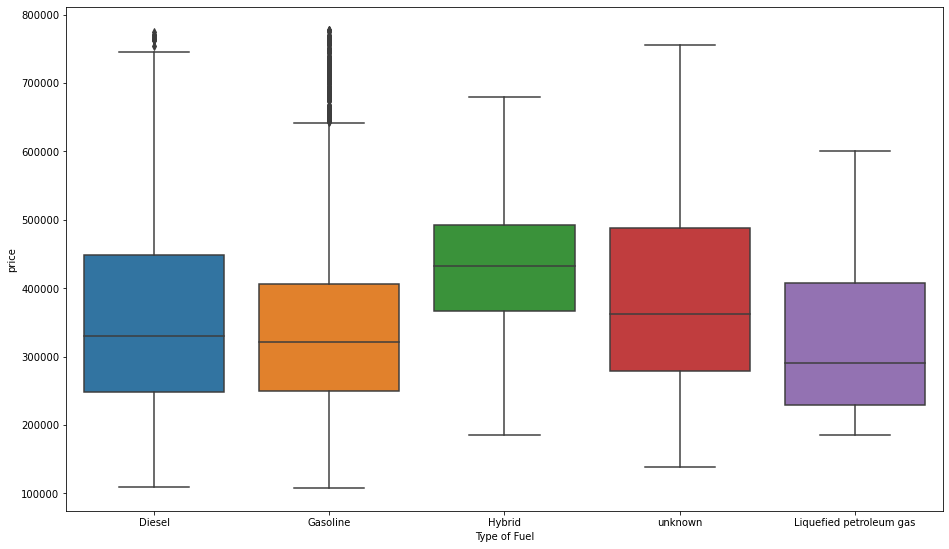

In [44]:
rcParams['figure.figsize'] = 15.7,9.27
sns.boxplot(x="Type of Fuel", y="price", data=dfnout)

In [45]:
dfnout.describe()

,price,year,mileage,seatingCapacity,doorCount,engineVolume,numberOfKeys,numberOfCD,NºIncidencias,NºRepintadas
count,9355.000000,9355.000000,9.355000e+03,9355.000000,9355.000000,9.355000e+03,9355.000000,9355.000000,9355.000000,9355.000000
mean,350269.909139,2018.027793,4.712207e+04,4.997221,4.684554,2.535347e+03,1.858044,0.929129,16.528381,1.121753
std,129536.709204,2.526295,3.945409e+04,0.177866,0.484539,4.163301e+04,0.400380,0.343237,12.069188,1.941697
min,108000.000000,2008.000000,1.000000e+00,2.000000,2.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000
25%,250000.000000,2016.000000,1.420000e+04,5.000000,4.000000,1.300000e+03,2.000000,1.000000,6.000000,0.000000
50%,325000.000000,2018.000000,3.938900e+04,5.000000,5.000000,1.500000e+03,2.000000,1.000000,15.000000,0.000000
75%,424000.000000,2020.000000,7.489200e+04,5.000000,5.000000,1.600000e+03,2.000000,1.000000,24.000000,2.000000
max,778000.000000,2021.000000,1.113367e+06,7.000000,5.000000,1.995000e+06,20.000000,15.000000,84.000000,18.000000


In [50]:
df1.iloc[sin_outs].describe(include=['object'])

,transmission,Type of Fuel,driveType2,bodyType,locationCity,Model_Brand,make,trimLevel,paintType,color
count,9355,9355,9355,9355,9355,9355,9355,9355,9355,9355
unique,2,5,4,11,7,182,34,1862,6,15
top,Automatic,Gasoline,Front Wheel Drive,Hatchback,İstanbul,Fiat Egea,Renault,1.4 Fire Easy 95HP,Opaque,White
freq,6270,6015,8810,3567,6714,697,1233,182,4832,4639


In [88]:
dfnout['paintType'].unique()
Mapping = {"unknown" : "unknown","Opak" : "Opaque",'Metalik' : "Metalic","İki renk":"Two Colours","Mat":"Matte","Sedef":"Pearl"}
no_iguales=[]
dfnout["paintType"] = dfnout["paintType"].map(Mapping)

<ipython-input-88-d1a2d96e040f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfnout["paintType"] = dfnout["paintType"].map(Mapping)


In [89]:
df1['paintType'].unique()

array(['Opaque', 'unknown', 'Metalic', 'Pearl', 'Two Colours', 'Matte'],
      dtype=object)

In [52]:
nulos=pd.concat([df1.isnull().sum()],keys=['Nulls'],axis=1)
nulos#nulos y vacios en un dataframe

,Nulls
price,0
year,0
mileage,0
transmission,0
Type of Fuel,0
driveType2,0
bodyType,0
seatingCapacity,0
doorCount,0
locationCity,0


In [53]:
df_group_one = df1.iloc[sin_outs][['driveType2','bodyType','price']]
df_group_one

,driveType2,bodyType,price
0,Front Wheel Drive,SUV,275000.0
1,Front Wheel Drive,Hatchback,139000.0
2,Front Wheel Drive,SUV,279000.0
3,Front Wheel Drive,Sedan,202000.0
4,Front Wheel Drive,Sedan,232000.0
...,...,...,...
9530,Rear Wheel Drive,Sedan,636000.0
9531,Front Wheel Drive,Hatchback,317000.0
9532,Four Wheel Drive,SUV,519000.0
9533,Front Wheel Drive,Sedan,182000.0


In [54]:
df_group_one = df_group_one.groupby(['driveType2','bodyType'],as_index=False).mean()#hace la media de las categoricas respecto de las numericas
df_group_one

,driveType2,bodyType,price
0,All Wheel Drive,Hatchback,484250.000000
1,All Wheel Drive,SUV,461777.777778
2,All Wheel Drive,Sedan,441875.000000
3,All Wheel Drive,Station Wagon,158000.000000
4,Four Wheel Drive,Coupe,724000.000000
5,Four Wheel Drive,Crossover,265000.000000
6,Four Wheel Drive,Hatchback,429090.909091
7,Four Wheel Drive,SUV,438352.941176
8,Four Wheel Drive,Sedan,597142.857143
9,Front Wheel Drive,Cabrio,374250.000000


In [55]:
grouped_pivot = df_group_one.pivot(index='driveType2',columns='bodyType')#gropuby categorico a pivot table
grouped_pivot

price                                          \
bodyType             Cabrio          Coupe Crossover      Hatchback   
driveType2                                                            
All Wheel Drive         NaN            NaN       NaN  484250.000000   
Four Wheel Drive        NaN  724000.000000  265000.0  429090.909091   
Front Wheel Drive  374250.0  466521.739130  410375.0  301831.623932   
Rear Wheel Drive   607250.0  535818.181818       NaN  411289.473684   

                                                                     \
bodyType                     MPV   Pick-Up  Roadster            SUV   
driveType2                                                            
All Wheel Drive              NaN       NaN       NaN  461777.777778   
Four Wheel Drive             NaN       NaN       NaN  438352.941176   
Front Wheel Drive  310986.666667  343000.0  278000.0  425137.292162   
Rear Wheel Drive   331000.000000       NaN       NaN  448916.666667   

                                                                
bodyType                   Sedan  Station Wagon  Station wagon  
driveType2                                                      
All Wheel Drive    441875.000000  158000.000000            NaN  
Four Wheel Drive   597142.857143            NaN            NaN  
Front Wheel Drive  331156.077348  244139.130435  343692.307692  
Rear Wheel Drive   536200.934579  554000.000000  554000.000000

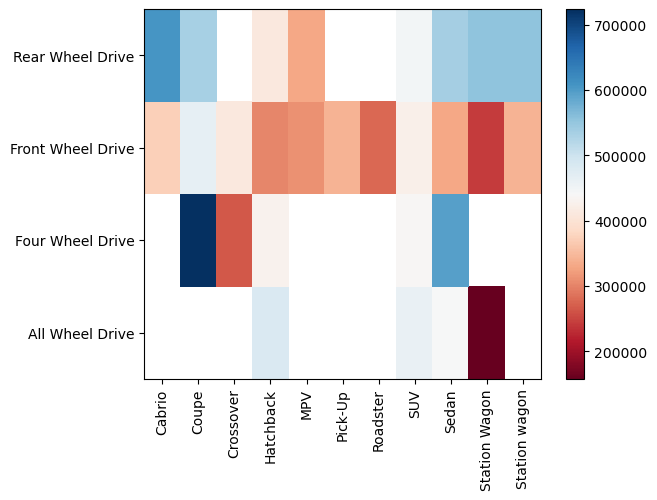

In [56]:
#use the grouped results
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

<p><b>Correlation</b>: a measure of the extent of interdependence between variables.</p>

<p><b>Causation</b>: the relationship between cause and effect between two variables.</p>

<p>It is important to know the difference between these two. Correlation does not imply causation. Determining correlation is much simpler  the determining causation as causation may require independent experimentation.</p>

<p><b>Pearson Correlation</b></p>
<p>The Pearson Correlation measures the linear dependence between two variables X and Y.</p>
<p>The resulting coefficient is a value between -1 and 1 inclusive, where:</p>
<ul>
    <li><b>1</b>: Perfect positive linear correlation.</li>
    <li><b>0</b>: No linear correlation, the two variables most likely do not affect each other.</li>
    <li><b>-1</b>: Perfect negative linear correlation.</li>
</ul>

In [680]:
df1.iloc[sin_outs].corr()

,price,year,mileage,seatingCapacity,doorCount,engineVolume,numberOfKeys,numberOfCD,NºIncidencias,NºRepintadas
price,1.000000,0.271154,-0.168922,0.012148,-0.034914,0.005416,0.068112,-0.012914,-0.183403,-0.221399
year,0.271154,1.000000,-0.693047,0.045614,0.037992,0.001303,-0.018506,-0.032619,-0.644331,-0.424387
mileage,-0.168922,-0.693047,1.000000,-0.014680,-0.114327,0.003512,-0.046022,0.026667,0.621979,0.393493
seatingCapacity,0.012148,0.045614,-0.014680,1.000000,0.136199,0.000481,-0.059584,-0.001476,-0.031487,-0.012950
doorCount,-0.034914,0.037992,-0.114327,0.136199,1.000000,-0.000799,0.001701,-0.041873,-0.018587,-0.074962
engineVolume,0.005416,0.001303,0.003512,0.000481,-0.000799,1.000000,-0.003100,0.005630,-0.011784,-0.008227
numberOfKeys,0.068112,-0.018506,-0.046022,-0.059584,0.001701,-0.003100,1.000000,0.227840,-0.023259,-0.058899
numberOfCD,-0.012914,-0.032619,0.026667,-0.001476,-0.041873,0.005630,0.227840,1.000000,-0.011940,0.004447
NºIncidencias,-0.183403,-0.644331,0.621979,-0.031487,-0.018587,-0.011784,-0.023259,-0.011940,1.000000,0.371716
NºRepintadas,-0.221399,-0.424387,0.393493,-0.012950,-0.074962,-0.008227,-0.058899,0.004447,0.371716,1.000000


<b>P-value</b>

<p>What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the

<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>


In [63]:
sf=dfnout.dtypes

type_columns=pd.DataFrame({'colum':sf.index, 'type':sf.values})
ints_columns=type_columns[type_columns['type']!="object"]
ints_columns

,colum,type
0,price,float64
1,year,int64
2,mileage,int64
7,seatingCapacity,int64
8,doorCount,int64
12,engineVolume,int64
14,numberOfKeys,int64
15,numberOfCD,int64
16,NºIncidencias,int64
17,NºRepintadas,int64


In [64]:
from scipy import stats

In [681]:
for i,pos in enumerate(ints_columns['colum'].tolist()):
    pearson_coef, p_value = stats.pearsonr(df1.iloc[sin_outs][pos], df1.iloc[sin_outs]['price'])
    print("The Pearson Correlation Coefficient for "+pos+"/price is", pearson_coef, " with a P-value of P =", round(p_value,8))  



The Pearson Correlation Coefficient for price/price is 0.9999999999999993  with a P-value of P = 0.0
The Pearson Correlation Coefficient for year/price is 0.2711535300942691  with a P-value of P = 0.0
The Pearson Correlation Coefficient for mileage/price is -0.16892163757668505  with a P-value of P = 0.0
The Pearson Correlation Coefficient for seatingCapacity/price is 0.012147535789806648  with a P-value of P = 0.24007027
The Pearson Correlation Coefficient for doorCount/price is -0.034914245633752124  with a P-value of P = 0.00073141
The Pearson Correlation Coefficient for engineVolume/price is 0.0054156692380049505  with a P-value of P = 0.60045651
The Pearson Correlation Coefficient for numberOfKeys/price is 0.0681119077072192  with a P-value of P = 0.0
The Pearson Correlation Coefficient for numberOfCD/price is -0.012914405879738385  with a P-value of P = 0.21167143
The Pearson Correlation Coefficient for NºIncidencias/price is -0.1834029805527172  with a P-value of P = 0.0
The Pea

<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between wheel-base and price is statistically significant, por ello descartamos, engineVolume,numberOfCD,seatingCapacity</p>

<h3>ANOVA: Analysis of Variance</h3>
<p>The Analysis of Variance  (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:</p>

<p><b>F-test score</b>: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.</p>

<p><b>P-value</b>:  P-value tells how statistically significant our calculated score value is.</p>

<p>If our price variable is strongly correlated with the variable we are analyzing, we expect ANOVA to return a sizeable F-test score and a small p-value.</p>

<p>Since ANOVA analyzes the difference between different groups of the same variable, the groupby function will come in handy. Because the ANOVA algorithm averages the data automatically, we do not need to take the average before hand.</p>

<p>To see if different types of 'drive-wheels' impact  'price', we group the data.</p>

In [66]:
#type_columns=pd.DataFrame({'colum':sf.index, 'type':sf.values})
str_columns=type_columns[type_columns['type']=="object"]
str_columns

,colum,type
3,transmission,object
4,Type of Fuel,object
5,driveType2,object
6,bodyType,object
9,locationCity,object
10,Model_Brand,object
11,make,object
13,trimLevel,object
18,paintType,object
19,color,object


In [67]:
strvsprice=str_columns['colum'].values.tolist()
strvsprice.append('price')
strvsprice

['transmission',
 'Type of Fuel',
 'driveType2',
 'bodyType',
 'locationCity',
 'Model_Brand',
 'make',
 'trimLevel',
 'paintType',
 'color',
 'price']

In [68]:
df_gptest = dfnout[strvsprice]
grouped_test2=df_gptest[['driveType2', 'price']].groupby(['driveType2'])
grouped_test2.head(1)#pilla una de cada uno si head(2) pilla 2

,driveType2,price
0,Front Wheel Drive,275000.0
12,All Wheel Drive,316000.0
23,Rear Wheel Drive,298000.0
38,Four Wheel Drive,486000.0


In [69]:
# ANOVA
wd4=grouped_test2.get_group('Four Wheel Drive')['price']
fwd=grouped_test2.get_group('Front Wheel Drive')['price']
awd=grouped_test2.get_group('All Wheel Drive')['price']
rwd=grouped_test2.get_group('Rear Wheel Drive')['price']
f_val, p_val = stats.f_oneway(fwd, rwd, awd,wd4)  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)  

ANOVA results: F= 244.24358683721343 , P = 1.3626632214774666e-152


This is a great result with a large F-test score showing a strong correlation and a P-value of almost 0 implying almost certain statistical significance. But does this mean all three tested groups are all this highly correlated?

Let's examine them separately.

In [70]:
f_val, p_val = stats.f_oneway(fwd, rwd)  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 562.456175247351 , P = 1.0676060178017219e-120


In [71]:
f_val, p_val = stats.f_oneway(wd4, rwd)  
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 29.718707472809953 , P = 7.930134575153359e-08


In [72]:
f_val, p_val = stats.f_oneway(awd, rwd)  
 
print("ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 9.56409077208389 , P = 0.0021459736763183336


In [73]:
f_val, p_val = stats.f_oneway(fwd, awd)  
 
print("ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 44.74252143772097 , P = 2.383301331566026e-11


In [74]:
f_val, p_val = stats.f_oneway(wd4, awd)  
 
print("ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 0.06830362672555133 , P = 0.7940389406737985


In [75]:
f_val, p_val = stats.f_oneway(wd4, fwd)  
 
print("ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 149.1371427068305 , P = 4.9697651254700555e-34


### Conclusión la variable DriveType se tomará en cuenta comprobar que tiene un fuerte impacto a través de ANOVA

In [76]:
df_gptest = dfnout[strvsprice]
grouped_test2=df_gptest[['transmission', 'price']].groupby(['transmission'])
grouped_test2.head(1)#pilla una de cada uno si head(2) pilla 2

,transmission,price
0,Automatic,275000.0
1,Manual,139000.0


In [77]:
# Realizo el ANOVA
Automatic=grouped_test2.get_group('Automatic')['price']
Manual=grouped_test2.get_group('Manual')['price']
f_val, p_val = stats.f_oneway(Manual,Automatic)  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)  

ANOVA results: F= 3807.301547358387 , P = 0.0


### Conclusión la variable transmission se tomará en cuenta comprobar que tiene un fuerte impacto a través de ANOVA

In [78]:
df_gptest = dfnout[strvsprice]
grouped_test2=df_gptest[['Type of Fuel', 'price']].groupby(['Type of Fuel'])
grouped_test2.head(1)#pilla una de cada uno si head(2) pilla 2
df1.groupby(['Type of Fuel']).size().reset_index(name='counts')

,Type of Fuel,counts
0,Diesel,3133
1,Gasoline,6122
2,Hybrid,118
3,Liquefied petroleum gas,28
4,unknown,134


In [79]:
# ANOVA
vals=[]
for i,pos in enumerate(dfnout['Type of Fuel'].unique().tolist()):
    
    vals.append(grouped_test2.get_group(pos)['price'])

f_val, p_val = stats.f_oneway(*vals) 
print( "ANOVA results: F=", f_val, ", P =", p_val)  

ANOVA results: F= 17.141236206425354 , P = 5.1299438449315015e-14


In [82]:
for i,pos in enumerate(combinSinRep(dfnout['Type of Fuel'].unique().tolist(),2)):
    f_val, p_val = stats.f_oneway(grouped_test2.get_group(pos[0])['price'],grouped_test2.get_group(pos[1])['price'])  
    print(pos)
    print( "ANOVA results: F=", f_val, ", P =", p_val) 
    print()

['Diesel', 'Gasoline']
ANOVA results: F= 21.23409647330309 , P = 4.120124222067037e-06

['Diesel', 'Hybrid']
ANOVA results: F= 26.236239655523665 , P = 3.201203291482913e-07

['Diesel', 'unknown']
ANOVA results: F= 4.4967073282089975 , P = 0.034036983395884776

['Diesel', 'Liquefied petroleum gas']
ANOVA results: F= 2.333882825654912 , P = 0.12668809439438813

['Gasoline', 'Hybrid']
ANOVA results: F= 43.23266135915254 , P = 5.261897812202394e-11

['Gasoline', 'unknown']
ANOVA results: F= 12.04225185850689 , P = 0.0005236531201117603

['Gasoline', 'Liquefied petroleum gas']
ANOVA results: F= 1.1545231393992026 , P = 0.2826472104162835

['Hybrid', 'unknown']
ANOVA results: F= 6.324521702352609 , P = 0.012549279274825482

['Hybrid', 'Liquefied petroleum gas']
ANOVA results: F= 22.345716702832938 , P = 5.519456788657162e-06

['unknown', 'Liquefied petroleum gas']
ANOVA results: F= 5.141231143137813 , P = 0.024702652411500374



### Conclusión la variable Type of Fuel se tomará en cuenta comprobar que tiene un fuerte impacto a través de ANOVA

In [437]:
strvsprice

['transmission',
 'Type of Fuel',
 'driveType2',
 'bodyType',
 'locationCity',
 'Model_Brand',
 'make',
 'trimLevel',
 'paintType',
 'color',
 'price']

In [91]:
df_gptest = dfnout[strvsprice]
grouped_test2=df_gptest[['paintType', 'price']].groupby(['paintType'])
grouped_test2.head(1)#pilla una de cada uno si head(2) pilla 2
df1.groupby(['paintType']).size().reset_index(name='counts')

,paintType,counts
0,Matte,1
1,Metalic,3677
2,Opaque,4896
3,Pearl,364
4,Two Colours,85
5,unknown,512


In [86]:
# ANOVA
vals=[]
for i,pos in enumerate(dfnout['paintType'].unique().tolist()):
    
    vals.append(grouped_test2.get_group(pos)['price'])

f_val, p_val = stats.f_oneway(*vals) 
print( "ANOVA results: F=", f_val, ", P =", p_val)  

ANOVA results: F= 55.33797828657188 , P = 7.297327978869456e-57



<details><summary>Click here for the combinSinRep function</summary>

```python
lista = ('a', 'b', 'c', 'd')

def combinSinRep(lista,x):
    combinaciones=[]
    x=x-1
    for i in range(len(lista)):
        combinaciones.append([])


    for a in range(len(lista)):
        combinaciones[0].append(lista[a])
        for b in range(a+1,len(lista)):
            combinaciones[1].append([lista[a],lista[b]])
            for c in range(b+1,len(lista)):
                combinaciones[2].append([lista[a],lista[b],lista[c]])
                for d in range(c+1,len(lista)):
                    combinaciones[3].append([lista[a],lista[b],lista[c],lista[d]])
                    for e in range(d+1,len(lista)):
                        combinaciones[4].append([lista[a],lista[b],lista[c],lista[d],lista[e]])
    return combinaciones[x]
combinSinRep(lista,2)

```

</details>

In [92]:
for i,pos in enumerate(combinSinRep(dfnout['paintType'].unique().tolist(),2)):
    f_val, p_val = stats.f_oneway(grouped_test2.get_group(pos[0])['price'],grouped_test2.get_group(pos[1])['price'])  
    print(pos)
    print( "ANOVA results: F=", f_val, ", P =", p_val) 
    print()

['Opaque', 'unknown']
ANOVA results: F= 9.677849197564433 , P = 0.0018748923030650446

['Opaque', 'Metalic']
ANOVA results: F= 232.28833102419483 , P = 9.245289094872971e-52

['Opaque', 'Pearl']
ANOVA results: F= 59.29106530882184 , P = 1.6180017670014312e-14

['Opaque', 'Two Colours']
ANOVA results: F= 37.541845908316226 , P = 9.644966782726263e-10

['Opaque', 'Matte']
ANOVA results: F= 0.981235364617463 , P = 0.3219436149269539

['unknown', 'Metalic']
ANOVA results: F= 14.814020407182571 , P = 0.00012046720000588747

['unknown', 'Pearl']
ANOVA results: F= 13.05537786317481 , P = 0.00032015275021299186

['unknown', 'Two Colours']
ANOVA results: F= 16.849277670571194 , P = 4.6296395220041764e-05

['unknown', 'Matte']
ANOVA results: F= 1.0625295859021573 , P = 0.3031433524173352

['Metalic', 'Pearl']
ANOVA results: F= 2.000419750426572 , P = 0.15733466947071265

['Metalic', 'Two Colours']
ANOVA results: F= 8.173766598306395 , P = 0.004274045468795101

['Metalic', 'Matte']
ANOVA results:

### Conclusión la variable Paint type se tomará en cuenta comprobar que tiene un fuerte impacto a través de ANOVA

In [93]:
df_gptest = dfnout[strvsprice]
grouped_test2=df_gptest[['locationCity', 'price']].groupby(['locationCity'])
grouped_test2.head(1)#pilla una de cada uno si head(2) pilla 2
df1.groupby(['locationCity']).size().reset_index(name='counts')

,locationCity,counts
0,Adana,231
1,Ankara,2442
2,Others,10
3,İstanbul,6852


In [94]:
# ANOVA
vals=[]
for i,pos in enumerate(dfnout['locationCity'].unique().tolist()):
    
    vals.append(grouped_test2.get_group(pos)['price'])

f_val, p_val = stats.f_oneway(*vals) 
print( "ANOVA results: F=", f_val, ", P =", p_val)  

ANOVA results: F= 1.4570065705565454 , P = 0.18874756112139782


In [95]:
for i,pos in enumerate(combinSinRep(dfnout['locationCity'].unique().tolist(),2)):
    f_val, p_val = stats.f_oneway(grouped_test2.get_group(pos[0])['price'],grouped_test2.get_group(pos[1])['price'])  
    print(pos)
    print( "ANOVA results: F=", f_val, ", P =", p_val) 
    print()

['Ankara', 'İstanbul']
ANOVA results: F= 6.246467488598423 , P = 0.012461574900691403

['Ankara', 'Adana']
ANOVA results: F= 1.1952224179854178 , P = 0.27437882172958966

['Ankara', 'İzmir']
ANOVA results: F= 1.2333840182248792 , P = 0.26686104817981493

['Ankara', 'unknown']
ANOVA results: F= 0.591975640325536 , P = 0.4417317224417098

['Ankara', 'Diyarbakır']
ANOVA results: F= 0.011469030390973972 , P = 0.9147237041827585

['Ankara', 'Bursa']
ANOVA results: F= 0.3185120629940668 , P = 0.5725559314576791

['İstanbul', 'Adana']
ANOVA results: F= 0.06255466445347586 , P = 0.802510222234141

['İstanbul', 'İzmir']
ANOVA results: F= 1.0486078506835208 , P = 0.3058648169452687

['İstanbul', 'unknown']
ANOVA results: F= 0.8373437607336356 , P = 0.3601904109385887

['İstanbul', 'Diyarbakır']
ANOVA results: F= 0.0024064393933889514 , P = 0.9608765477230338

['İstanbul', 'Bursa']
ANOVA results: F= 0.40008832120899557 , P = 0.5270651907020273

['Adana', 'İzmir']
ANOVA results: F= 1.0483539781379

C:\Users\javie\Anaconda3\lib\site-packages\scipy\stats\stats.py:3688: F_onewayBadInputSizesWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  warnings.warn(F_onewayBadInputSizesWarning(msg))


### vemos que los resultados no son significativos pues lo valores de F test Score son muy bajos 

In [57]:
gs=df1.groupby(['locationCity']).size().reset_index(name='counts')

dfonlysmallcitys=df1[df1.locationCity.isin(gs[gs['counts']<200]['locationCity'].values.tolist())]
list(dfonlysmallcitys['locationCity'].unique())

['İzmir', 'unknown', 'Diyarbakır', 'Bursa']

In [58]:
dict_2=dict.fromkeys(list(dfonlysmallcitys['locationCity'].unique()), 'Others')
dict_1={"Ankara" : "Ankara","İstanbul":"İstanbul","Adana":"Adana"}
dict_1.update(dict_2)
Mapping = dict_1

df1["locationCity"] = df1["locationCity"].map(Mapping)
df1

<ipython-input-58-df25607f711d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["locationCity"] = df1["locationCity"].map(Mapping)


,price,year,mileage,transmission,Type of Fuel,driveType2,bodyType,seatingCapacity,doorCount,locationCity,Model_Brand,make,engineVolume,trimLevel,numberOfKeys,numberOfCD,NºIncidencias,NºRepintadas,paintType,color
0,275000.0,2021,14040,Automatic,Diesel,Front Wheel Drive,SUV,5,5,Ankara,Citroen C3 AirCross,Citroen,1500,1.5 Bluehdi Feel Eat6 120HP,2,0,6,0,Opaque,Dark grey
1,139000.0,2015,66065,Manual,Gasoline,Front Wheel Drive,Hatchback,5,5,Ankara,Ford Fiesta,Ford,1200,1.25i Trend X Esp 82HP,2,1,8,1,unknown,White
2,279000.0,2018,32351,Manual,Gasoline,Front Wheel Drive,SUV,5,5,İstanbul,Hyundai Tucson,Hyundai,1600,1.6 Gdi 4x2 Style 132HP,2,1,15,0,Metalic,Other
3,202000.0,2019,17883,Manual,Gasoline,Front Wheel Drive,Sedan,5,5,İstanbul,Renault Megane,Renault,1300,Sedan 1.3 Tce Joy 140HP,2,1,10,1,Metalic,Other
4,232000.0,2017,62651,Automatic,Diesel,Front Wheel Drive,Sedan,5,4,Ankara,Toyota Corolla,Toyota,1400,1.4 D-4D Touch M/M 90HP,2,1,16,3,Opaque,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9530,636000.0,2016,89333,Automatic,Gasoline,Rear Wheel Drive,Sedan,5,4,Ankara,Mercedes-Benz C,Mercedes-Benz,1595,180 Fascination 7G-Tronic 156HP,2,1,29,5,Metalic,Dark grey
9531,317000.0,2016,103655,Manual,Diesel,Front Wheel Drive,Hatchback,5,5,İstanbul,Renault Megane,Renault,1500,1.5 Dci Icon 110HP,2,1,33,0,Metalic,White
9532,519000.0,2020,36428,Automatic,Diesel,Four Wheel Drive,SUV,5,5,Ankara,Nissan Qashqai,Nissan,1500,1.5 Dci Sky Pack Dct 115HP,2,1,11,0,Metalic,Light grey
9533,182000.0,2015,81512,Manual,Gasoline,Front Wheel Drive,Sedan,5,5,Adana,Renault Symbol,Renault,1200,1.2 16v Joy 75HP,2,1,39,5,Opaque,White


In [60]:
df_gptest = df1[strvsprice]
grouped_test2=df_gptest[['locationCity', 'price']].groupby(['locationCity'])
grouped_test2.head(1)#pilla una de cada uno si head(2) pilla 2
df1.groupby(['locationCity']).size().reset_index(name='counts')

,locationCity,counts
0,Adana,231
1,Ankara,2442
2,Others,10
3,İstanbul,6852


In [560]:
# ANOVA
vals=[]
for i,pos in enumerate(df1['locationCity'].unique().tolist()):
    
    vals.append(grouped_test2.get_group(pos)['price'])

f_val, p_val = stats.f_oneway(*vals) 
print( "ANOVA results: F=", f_val, ", P =", p_val)  

ANOVA results: F= 1.0098121372003919 , P = 0.38715812376885933


In [561]:
for i,pos in enumerate(combinSinRep(df1['locationCity'].unique().tolist(),2)):
    f_val, p_val = stats.f_oneway(grouped_test2.get_group(pos[0])['price'],grouped_test2.get_group(pos[1])['price'])  
    print(pos)
    print( "ANOVA results: F=", f_val, ", P =", p_val) 
    print()

['Ankara', 'İstanbul']
ANOVA results: F= 1.818826531785983 , P = 0.1774858891323255

['Ankara', 'Adana']
ANOVA results: F= 2.1396285533900516 , P = 0.1436542953385795

['Ankara', 'Others']
ANOVA results: F= 0.013515668355276584 , P = 0.9074584655242275

['İstanbul', 'Adana']
ANOVA results: F= 0.9089358127767353 , P = 0.3404294794969239

['İstanbul', 'Others']
ANOVA results: F= 0.00013111699180500422 , P = 0.990864249487133

['Adana', 'Others']
ANOVA results: F= 0.04739026620818201 , P = 0.8278540164231587



### vemos que aunque han mejorado, los resultados no son significativos pues lo valores de F test Score son muy bajos por lo tanto descartaremos la variable de locationCity para nuestro modelo

In [562]:
strvsprice

['transmission',
 'Type of Fuel',
 'driveType2',
 'bodyType',
 'locationCity',
 'Model_Brand',
 'make',
 'trimLevel',
 'paintType',
 'color',
 'price']

In [96]:
df_gptest = dfnout[strvsprice]
grouped_test2=df_gptest[['Model_Brand', 'price']].groupby(['Model_Brand'])
grouped_test2.head(1)#pilla una de cada uno si head(2) pilla 2
df1.groupby(['Model_Brand']).size().reset_index(name='counts')

,Model_Brand,counts
0,Alfa Romeo Giulietta,8
1,Audi A1,3
2,Audi A3,156
3,Audi A4,46
4,Audi A5,14
...,...,...
192,Volvo V40,10
193,Volvo V40 Cross Country,1
194,Volvo V90 Cross Country,2
195,Volvo XC40,8


In [97]:
# ANOVA
vals=[]
for i,pos in enumerate(dfnout['Model_Brand'].unique().tolist()):
    
    vals.append(grouped_test2.get_group(pos)['price'])

f_val, p_val = stats.f_oneway(*vals) 
print( "ANOVA results: F=", f_val, ", P =", p_val)  

ANOVA results: F= 97.37490330188379 , P = 0.0


### vemos que los resultados son positivos por tanto añadimos la variable model_brand al modelo

In [569]:
df_gptest = df1[strvsprice]
grouped_test2=df_gptest[['make', 'price']].groupby(['make'])
grouped_test2.head(1)#pilla una de cada uno si head(2) pilla 2
df1.groupby(['make']).size().reset_index(name='counts')

,make,counts
0,Alfa Romeo,8
1,Audi,266
2,BMW,315
3,Citroen,253
4,Cupra,1
5,DS Automobiles,4
6,Dacia,276
7,Fiat,814
8,Ford,461
9,Honda,452


In [570]:
# ANOVA
vals=[]
for i,pos in enumerate(df1['make'].unique().tolist()):
    
    vals.append(grouped_test2.get_group(pos)['price'])

f_val, p_val = stats.f_oneway(*vals) 
print( "ANOVA results: F=", f_val, ", P =", p_val)  

ANOVA results: F= 175.4986963109036 , P = 0.0


### vemos que los resultados son positivos por tanto añadimos la variable model_brand al modelo

In [571]:
df_gptest = df1[strvsprice]
grouped_test2=df_gptest[['trimLevel', 'price']].groupby(['trimLevel'])
grouped_test2.head(1)#pilla una de cada uno si head(2) pilla 2
df1.groupby(['trimLevel']).size().reset_index(name='counts')

,trimLevel,counts
0,,7
1,0.9 Tce Joy 90HP,70
2,0.9 Tce Lpg Stepway 90HP,2
3,0.9 Tce Stepway 90HP,10
4,0.9 Tce Stepway Easy-R 90HP,24
...,...,...
1919,Touring Sports 1.6 Advance Multidrive S 132HP,1
1920,Touring Sports 1.6 Advance Skypack Multidrive ...,1
1921,Type-R 2.0 T i-VTEC Gt 320HP,1
1922,Verso 1.6 Comfort 132HP,1


In [572]:
# ANOVA
vals=[]
for i,pos in enumerate(df1['trimLevel'].unique().tolist()):
    
    vals.append(grouped_test2.get_group(pos)['price'])

f_val, p_val = stats.f_oneway(*vals) 
print( "ANOVA results: F=", f_val, ", P =", p_val)  

ANOVA results: F= 30.24227365571533 , P = 0.0


### vemos que los resultados son positivos por tanto añadimos la variable model_brand al modelo

In [574]:
df_gptest = df1[strvsprice]
grouped_test2=df_gptest[['color', 'price']].groupby(['color'])
grouped_test2.head(1)#pilla una de cada uno si head(2) pilla 2
df1.groupby(['color']).size().reset_index(name='counts')

,color,counts
0,Beige,73
1,Black,623
2,Brown,88
3,Burgundy,69
4,Dark blue,465
5,Dark green,34
6,Dark grey,1054
7,Light blue,183
8,Light green,13
9,Light grey,718


In [577]:
# ANOVA
vals=[]
for i,pos in enumerate(df1['color'].unique().tolist()):
    
    vals.append(grouped_test2.get_group(pos)['price'])

f_val, p_val = stats.f_oneway(*vals) 
print( "ANOVA results: F=", f_val, ", P =", p_val)  

ANOVA results: F= 31.86856862039797 , P = 2.7994712523451827e-84


### vemos que los resultados son positivos por tanto añadimos la variable model_brand al modelo

## CONCLUSION VARIABLES IMPORTANTES

<p>We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:</p>

Continuous numerical variables:

<ul>
    <li>year</li>
    <li>mileage</li>
    <li>transmission</li>
    <li>Type of Fuel</li>
    <li>Model_Brand</li>
    <li>make</li>
    <li>trimLevel</li>
    <li>NºIncidencias</li>
    <li>color</li>
    <li>NºRepintadas</li>
    <li>NºIncidencias</li>
    <li>paintType</li>
</ul>

Categorical variables:

<ul>
    <li>Drive-wheels</li>
</ul>

<p>As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.</p>


In [588]:
df1.columns

Index(['price', 'year', 'mileage', 'transmission', 'Type of Fuel',
       'driveType2', 'bodyType', 'seatingCapacity', 'doorCount',
       'locationCity', 'Model_Brand', 'make', 'engineVolume', 'trimLevel',
       'numberOfKeys', 'numberOfCD', 'NºIncidencias', 'NºRepintadas',
       'paintType', 'color'],
      dtype='object')

In [ ]:
dfmodel=df1[]

In [98]:
cols=[]
for i in df1.columns.values.tolist():
    if i not in ["locationCity","numberOfCD","engineVolume","seatingCapacity"]:
        cols.append(i)


In [99]:
dfmodel=dfnout[cols]
dfmodel
dfmodel.dtypes

price            float64
year               int64
mileage            int64
transmission      object
Type of Fuel      object
driveType2        object
bodyType          object
doorCount          int64
Model_Brand       object
make              object
trimLevel         object
numberOfKeys       int64
NºIncidencias      int64
NºRepintadas       int64
paintType         object
color             object
dtype: object

Text(0, 0.5, 'Avg Price (Dollars)')

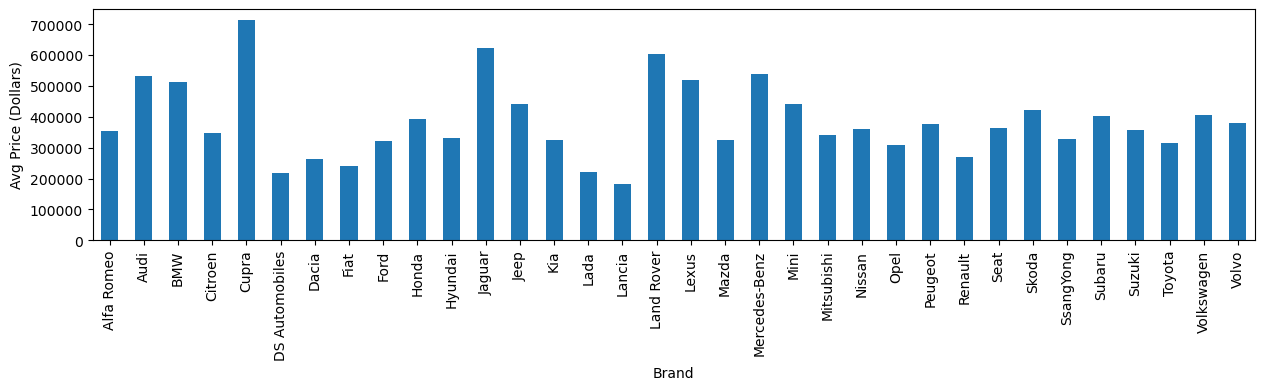

In [100]:
df_comp_avg_price = dfmodel[['make','price']].groupby("make", as_index = False).mean().rename(columns={'price':'price'})
plt1 = df_comp_avg_price.plot(x = 'make', kind='bar',legend = False, sort_columns = True, figsize = (15,3))
plt1.set_xlabel("Brand")
plt1.set_ylabel("Avg Price (Dollars)")


In [101]:

bins = np.linspace(min(df_comp_avg_price["price"]), max(df_comp_avg_price["price"]), 4)
group_names = ['cheap_brand','medium_brand','high_brand']
df_comp_avg_price['binning']=pd.cut(df_comp_avg_price["price"], bins, labels=group_names, include_lowest=True )
df_comp_avg_price

,make,price,binning
0,Alfa Romeo,353000.000000,cheap_brand
1,Audi,532306.722689,medium_brand
2,BMW,514802.281369,medium_brand
3,Citroen,346624.505929,cheap_brand
4,Cupra,713000.000000,high_brand
5,DS Automobiles,218000.000000,cheap_brand
6,Dacia,264884.057971,cheap_brand
7,Fiat,240793.611794,cheap_brand
8,Ford,323303.687636,cheap_brand
9,Honda,393429.844098,medium_brand


In [102]:
df_comp_avg_price.groupby(['binning']).size().reset_index(name='counts')

,binning,counts
0,cheap_brand,18
1,medium_brand,12
2,high_brand,4


In [103]:
makes=[]
make_category=[]
for i,pos in enumerate(df_comp_avg_price.values.tolist()):
    makes.append(pos[0])
    make_category.append(pos[2])


In [105]:
dfmodel["make_category"] = dfmodel["make"].map(dict(zip(makes, make_category)))#mapear
dfmodel

<ipython-input-105-d50b71385bf6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfmodel["make_category"] = dfmodel["make"].map(dict(zip(makes, make_category)))#mapear


,price,year,mileage,transmission,Type of Fuel,driveType2,bodyType,doorCount,Model_Brand,make,trimLevel,numberOfKeys,NºIncidencias,NºRepintadas,paintType,color,make_category
0,275000.0,2021,14040,Automatic,Diesel,Front Wheel Drive,SUV,5,Citroen C3 AirCross,Citroen,1.5 Bluehdi Feel Eat6 120HP,2,6,0,Opaque,Dark grey,cheap_brand
1,139000.0,2015,66065,Manual,Gasoline,Front Wheel Drive,Hatchback,5,Ford Fiesta,Ford,1.25i Trend X Esp 82HP,2,8,1,unknown,White,cheap_brand
2,279000.0,2018,32351,Manual,Gasoline,Front Wheel Drive,SUV,5,Hyundai Tucson,Hyundai,1.6 Gdi 4x2 Style 132HP,2,15,0,Metalic,Other,cheap_brand
3,202000.0,2019,17883,Manual,Gasoline,Front Wheel Drive,Sedan,5,Renault Megane,Renault,Sedan 1.3 Tce Joy 140HP,2,10,1,Metalic,Other,cheap_brand
4,232000.0,2017,62651,Automatic,Diesel,Front Wheel Drive,Sedan,4,Toyota Corolla,Toyota,1.4 D-4D Touch M/M 90HP,2,16,3,Opaque,White,cheap_brand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9530,636000.0,2016,89333,Automatic,Gasoline,Rear Wheel Drive,Sedan,4,Mercedes-Benz C,Mercedes-Benz,180 Fascination 7G-Tronic 156HP,2,29,5,Metalic,Dark grey,high_brand
9531,317000.0,2016,103655,Manual,Diesel,Front Wheel Drive,Hatchback,5,Renault Megane,Renault,1.5 Dci Icon 110HP,2,33,0,Metalic,White,cheap_brand
9532,519000.0,2020,36428,Automatic,Diesel,Four Wheel Drive,SUV,5,Nissan Qashqai,Nissan,1.5 Dci Sky Pack Dct 115HP,2,11,0,Metalic,Light grey,cheap_brand
9533,182000.0,2015,81512,Manual,Gasoline,Front Wheel Drive,Sedan,5,Renault Symbol,Renault,1.2 16v Joy 75HP,2,39,5,Opaque,White,cheap_brand


In [106]:
df_comp_avg_price = dfmodel[['Model_Brand','price']].groupby("Model_Brand", as_index = False).mean().rename(columns={'price':'price'})


bins = np.linspace(min(df_comp_avg_price["price"]), max(df_comp_avg_price["price"]), 6)
group_names = ['deep_cheap_brand','cheap_brand','medium_brand','high_brand','deep_high_brand']
df_comp_avg_price['binning']=pd.cut(df_comp_avg_price["price"], bins, labels=group_names, include_lowest=True )
df_comp_avg_price

,Model_Brand,price,binning
0,Alfa Romeo Giulietta,353000.000000,cheap_brand
1,Audi A1,337333.333333,cheap_brand
2,Audi A3,514449.664430,high_brand
3,Audi A4,547625.000000,high_brand
4,Audi A5,589777.777778,high_brand
...,...,...,...
177,Volkswagen Tiguan,491675.531915,high_brand
178,Volkswagen Tiguan AllSpace,632666.666667,deep_high_brand
179,Volvo S60,357428.571429,cheap_brand
180,Volvo V40,418400.000000,medium_brand


In [107]:
df_comp_avg_price.groupby(['binning']).size().reset_index(name='counts')

,binning,counts
0,deep_cheap_brand,38
1,cheap_brand,59
2,medium_brand,43
3,high_brand,33
4,deep_high_brand,9


In [108]:
makes=[]
make_category=[]
for i,pos in enumerate(df_comp_avg_price.values.tolist()):
    makes.append(pos[0])
    make_category.append(pos[2])


In [109]:
dfmodel["Model_Brand_category"] = dfmodel["Model_Brand"].map(dict(zip(makes, make_category)))#mapear
dfmodel

<ipython-input-109-8cd436ce021e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfmodel["Model_Brand_category"] = dfmodel["Model_Brand"].map(dict(zip(makes, make_category)))#mapear


,price,year,mileage,transmission,Type of Fuel,driveType2,bodyType,doorCount,Model_Brand,make,trimLevel,numberOfKeys,NºIncidencias,NºRepintadas,paintType,color,make_category,Model_Brand_category
0,275000.0,2021,14040,Automatic,Diesel,Front Wheel Drive,SUV,5,Citroen C3 AirCross,Citroen,1.5 Bluehdi Feel Eat6 120HP,2,6,0,Opaque,Dark grey,cheap_brand,medium_brand
1,139000.0,2015,66065,Manual,Gasoline,Front Wheel Drive,Hatchback,5,Ford Fiesta,Ford,1.25i Trend X Esp 82HP,2,8,1,unknown,White,cheap_brand,deep_cheap_brand
2,279000.0,2018,32351,Manual,Gasoline,Front Wheel Drive,SUV,5,Hyundai Tucson,Hyundai,1.6 Gdi 4x2 Style 132HP,2,15,0,Metalic,Other,cheap_brand,medium_brand
3,202000.0,2019,17883,Manual,Gasoline,Front Wheel Drive,Sedan,5,Renault Megane,Renault,Sedan 1.3 Tce Joy 140HP,2,10,1,Metalic,Other,cheap_brand,cheap_brand
4,232000.0,2017,62651,Automatic,Diesel,Front Wheel Drive,Sedan,4,Toyota Corolla,Toyota,1.4 D-4D Touch M/M 90HP,2,16,3,Opaque,White,cheap_brand,cheap_brand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9530,636000.0,2016,89333,Automatic,Gasoline,Rear Wheel Drive,Sedan,4,Mercedes-Benz C,Mercedes-Benz,180 Fascination 7G-Tronic 156HP,2,29,5,Metalic,Dark grey,high_brand,high_brand
9531,317000.0,2016,103655,Manual,Diesel,Front Wheel Drive,Hatchback,5,Renault Megane,Renault,1.5 Dci Icon 110HP,2,33,0,Metalic,White,cheap_brand,cheap_brand
9532,519000.0,2020,36428,Automatic,Diesel,Four Wheel Drive,SUV,5,Nissan Qashqai,Nissan,1.5 Dci Sky Pack Dct 115HP,2,11,0,Metalic,Light grey,cheap_brand,medium_brand
9533,182000.0,2015,81512,Manual,Gasoline,Front Wheel Drive,Sedan,5,Renault Symbol,Renault,1.2 16v Joy 75HP,2,39,5,Opaque,White,cheap_brand,deep_cheap_brand


In [110]:
df_comp_avg_price = dfmodel[['trimLevel','price']].groupby("trimLevel", as_index = False).mean().rename(columns={'price':'price'})


bins = np.linspace(min(df_comp_avg_price["price"]), max(df_comp_avg_price["price"]), 6)
group_names = ['deep_cheap_trimLevel','cheap_trimLevel','medium_trimLevel','high_trimLevel','deep_trimLevel']
df_comp_avg_price['binning']=pd.cut(df_comp_avg_price["price"], bins, labels=group_names, include_lowest=True )
df_comp_avg_price.groupby(['binning']).size().reset_index(name='counts')

,binning,counts
0,deep_cheap_trimLevel,421
1,cheap_trimLevel,724
2,medium_trimLevel,420
3,high_trimLevel,211
4,deep_trimLevel,86


In [111]:
makes=[]
make_category=[]
for i,pos in enumerate(df_comp_avg_price.values.tolist()):
    makes.append(pos[0])
    make_category.append(pos[2])
dfmodel["Model_Brand_trimLevel"] = dfmodel["trimLevel"].map(dict(zip(makes, make_category)))#mapear
dfmodel

<ipython-input-111-f50aadbe2915>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfmodel["Model_Brand_trimLevel"] = dfmodel["trimLevel"].map(dict(zip(makes, make_category)))#mapear


,price,year,mileage,transmission,Type of Fuel,driveType2,bodyType,doorCount,Model_Brand,make,trimLevel,numberOfKeys,NºIncidencias,NºRepintadas,paintType,color,make_category,Model_Brand_category,Model_Brand_trimLevel
0,275000.0,2021,14040,Automatic,Diesel,Front Wheel Drive,SUV,5,Citroen C3 AirCross,Citroen,1.5 Bluehdi Feel Eat6 120HP,2,6,0,Opaque,Dark grey,cheap_brand,medium_brand,cheap_trimLevel
1,139000.0,2015,66065,Manual,Gasoline,Front Wheel Drive,Hatchback,5,Ford Fiesta,Ford,1.25i Trend X Esp 82HP,2,8,1,unknown,White,cheap_brand,deep_cheap_brand,deep_cheap_trimLevel
2,279000.0,2018,32351,Manual,Gasoline,Front Wheel Drive,SUV,5,Hyundai Tucson,Hyundai,1.6 Gdi 4x2 Style 132HP,2,15,0,Metalic,Other,cheap_brand,medium_brand,medium_trimLevel
3,202000.0,2019,17883,Manual,Gasoline,Front Wheel Drive,Sedan,5,Renault Megane,Renault,Sedan 1.3 Tce Joy 140HP,2,10,1,Metalic,Other,cheap_brand,cheap_brand,cheap_trimLevel
4,232000.0,2017,62651,Automatic,Diesel,Front Wheel Drive,Sedan,4,Toyota Corolla,Toyota,1.4 D-4D Touch M/M 90HP,2,16,3,Opaque,White,cheap_brand,cheap_brand,cheap_trimLevel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9530,636000.0,2016,89333,Automatic,Gasoline,Rear Wheel Drive,Sedan,4,Mercedes-Benz C,Mercedes-Benz,180 Fascination 7G-Tronic 156HP,2,29,5,Metalic,Dark grey,high_brand,high_brand,high_trimLevel
9531,317000.0,2016,103655,Manual,Diesel,Front Wheel Drive,Hatchback,5,Renault Megane,Renault,1.5 Dci Icon 110HP,2,33,0,Metalic,White,cheap_brand,cheap_brand,cheap_trimLevel
9532,519000.0,2020,36428,Automatic,Diesel,Four Wheel Drive,SUV,5,Nissan Qashqai,Nissan,1.5 Dci Sky Pack Dct 115HP,2,11,0,Metalic,Light grey,cheap_brand,medium_brand,medium_trimLevel
9533,182000.0,2015,81512,Manual,Gasoline,Front Wheel Drive,Sedan,5,Renault Symbol,Renault,1.2 16v Joy 75HP,2,39,5,Opaque,White,cheap_brand,deep_cheap_brand,deep_cheap_trimLevel


In [845]:
dfmodel['paintType'].unique()
dfmodel.groupby(['paintType']).size().reset_index(name='counts')

,paintType,counts
0,Matte,1
1,Metalic,3584
2,Opaque,4832
3,Pearl,358
4,Two Colours,85
5,unknown,495


In [851]:
dfmodel.groupby(['bodyType']).size().reset_index(name='counts')

,bodyType,counts
0,Cabrio,8
1,Coupe,93
2,Crossover,9
3,Hatchback,3567
4,MPV,76
5,Pick-Up,1
6,Roadster,1
7,SUV,2323
8,Sedan,3132
9,Station Wagon,117


In [866]:
dummy_variable_1 = pd.get_dummies(dfmodel["bodyType"])
# merge data frame "df" and "dummy_variable_1" 

dfmodel_2 = pd.concat([dfmodel, dummy_variable_1], axis=1)
dfmodel_2

,price,year,mileage,transmission,Type of Fuel,driveType2,bodyType,doorCount,Model_Brand,make,...,Cabrio,Coupe,Crossover,Hatchback,MPV,Pick-Up,Roadster,SUV,Sedan,Station Wagon
0,275000.0,2021,14040,Automatic,Diesel,Front Wheel Drive,SUV,5,Citroen C3 AirCross,Citroen,...,0,0,0,0,0,0,0,1,0,0
1,139000.0,2015,66065,Manual,Gasoline,Front Wheel Drive,Hatchback,5,Ford Fiesta,Ford,...,0,0,0,1,0,0,0,0,0,0
2,279000.0,2018,32351,Manual,Gasoline,Front Wheel Drive,SUV,5,Hyundai Tucson,Hyundai,...,0,0,0,0,0,0,0,1,0,0
3,202000.0,2019,17883,Manual,Gasoline,Front Wheel Drive,Sedan,5,Renault Megane,Renault,...,0,0,0,0,0,0,0,0,1,0
4,232000.0,2017,62651,Automatic,Diesel,Front Wheel Drive,Sedan,4,Toyota Corolla,Toyota,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9530,636000.0,2016,89333,Automatic,Gasoline,Rear Wheel Drive,Sedan,4,Mercedes-Benz C,Mercedes-Benz,...,0,0,0,0,0,0,0,0,1,0
9531,317000.0,2016,103655,Manual,Diesel,Front Wheel Drive,Hatchback,5,Renault Megane,Renault,...,0,0,0,1,0,0,0,0,0,0
9532,519000.0,2020,36428,Automatic,Diesel,Four Wheel Drive,SUV,5,Nissan Qashqai,Nissan,...,0,0,0,0,0,0,0,1,0,0
9533,182000.0,2015,81512,Manual,Gasoline,Front Wheel Drive,Sedan,5,Renault Symbol,Renault,...,0,0,0,0,0,0,0,0,1,0


In [872]:
dfstoconcat=[]
dummy_variable_1 = pd.get_dummies(dfmodel["bodyType"])
# merge data frame "df" and "dummy_variable_1" 



,Cabrio,Coupe,Crossover,Hatchback,MPV,Pick-Up,Roadster,SUV,Sedan,Station Wagon,...,make,trimLevel,numberOfKeys,NºIncidencias,NºRepintadas,paintType,color,make_category,Model_Brand_category,Model_Brand_trimLevel
0,0,0,0,0,0,0,0,1,0,0,...,Citroen,1.5 Bluehdi Feel Eat6 120HP,2,6,0,Opaque,Dark grey,cheap_brand,medium_brand,cheap_trimLevel
1,0,0,0,1,0,0,0,0,0,0,...,Ford,1.25i Trend X Esp 82HP,2,8,1,unknown,White,cheap_brand,deep_cheap_brand,deep_cheap_trimLevel
2,0,0,0,0,0,0,0,1,0,0,...,Hyundai,1.6 Gdi 4x2 Style 132HP,2,15,0,Metalic,Other,cheap_brand,medium_brand,medium_trimLevel
3,0,0,0,0,0,0,0,0,1,0,...,Renault,Sedan 1.3 Tce Joy 140HP,2,10,1,Metalic,Other,cheap_brand,cheap_brand,cheap_trimLevel
4,0,0,0,0,0,0,0,0,1,0,...,Toyota,1.4 D-4D Touch M/M 90HP,2,16,3,Opaque,White,cheap_brand,cheap_brand,cheap_trimLevel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9530,0,0,0,0,0,0,0,0,1,0,...,Mercedes-Benz,180 Fascination 7G-Tronic 156HP,2,29,5,Metalic,Dark grey,high_brand,high_brand,high_trimLevel
9531,0,0,0,1,0,0,0,0,0,0,...,Renault,1.5 Dci Icon 110HP,2,33,0,Metalic,White,cheap_brand,cheap_brand,cheap_trimLevel
9532,0,0,0,0,0,0,0,1,0,0,...,Nissan,1.5 Dci Sky Pack Dct 115HP,2,11,0,Metalic,Light grey,cheap_brand,medium_brand,medium_trimLevel
9533,0,0,0,0,0,0,0,0,1,0,...,Renault,1.2 16v Joy 75HP,2,39,5,Opaque,White,cheap_brand,deep_cheap_brand,deep_cheap_trimLevel


In [116]:
sf=dfmodel.dtypes

type_columns=pd.DataFrame({'colum':sf.index, 'type':sf.values})
ints_columns=type_columns[type_columns['type']!="object"]
str_columns=type_columns[type_columns['type']=="object"]
str_columns

,colum,type
3,transmission,object
4,Type of Fuel,object
5,driveType2,object
6,bodyType,object
8,Model_Brand,object
9,make,object
10,trimLevel,object
14,paintType,object
15,color,object
16,make_category,object


In [134]:
dfstoconcat=[]
for i in str_columns['colum']:
    print(i)
    if i not in ['make','locationCity','Model_Brand','trimLevel']:
        dummy=pd.get_dummies(dfmodel[i])
        dummy.columns=[str(i)+" "+x for x in dummy.columns.tolist()]
        dfstoconcat.append(dummy)
# merge data frame "df" and "dummy_variable_1" 

transmission
Type of Fuel
driveType2
bodyType
Model_Brand
make
trimLevel
paintType
color
make_category
Model_Brand_category
Model_Brand_trimLevel


In [135]:
dfstoconcat.insert(0, dfmodel)
dfmodel_2 = pd.concat(dfstoconcat, axis=1)
dfmodel_2

,price,year,mileage,transmission,Type of Fuel,driveType2,bodyType,doorCount,Model_Brand,make,...,Model_Brand_category cheap_brand,Model_Brand_category deep_cheap_brand,Model_Brand_category deep_high_brand,Model_Brand_category high_brand,Model_Brand_category medium_brand,Model_Brand_trimLevel cheap_trimLevel,Model_Brand_trimLevel deep_cheap_trimLevel,Model_Brand_trimLevel deep_trimLevel,Model_Brand_trimLevel high_trimLevel,Model_Brand_trimLevel medium_trimLevel
0,275000.0,2021,14040,Automatic,Diesel,Front Wheel Drive,SUV,5,Citroen C3 AirCross,Citroen,...,0,0,0,0,1,1,0,0,0,0
1,139000.0,2015,66065,Manual,Gasoline,Front Wheel Drive,Hatchback,5,Ford Fiesta,Ford,...,0,1,0,0,0,0,1,0,0,0
2,279000.0,2018,32351,Manual,Gasoline,Front Wheel Drive,SUV,5,Hyundai Tucson,Hyundai,...,0,0,0,0,1,0,0,0,0,1
3,202000.0,2019,17883,Manual,Gasoline,Front Wheel Drive,Sedan,5,Renault Megane,Renault,...,1,0,0,0,0,1,0,0,0,0
4,232000.0,2017,62651,Automatic,Diesel,Front Wheel Drive,Sedan,4,Toyota Corolla,Toyota,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9530,636000.0,2016,89333,Automatic,Gasoline,Rear Wheel Drive,Sedan,4,Mercedes-Benz C,Mercedes-Benz,...,0,0,0,1,0,0,0,0,1,0
9531,317000.0,2016,103655,Manual,Diesel,Front Wheel Drive,Hatchback,5,Renault Megane,Renault,...,1,0,0,0,0,1,0,0,0,0
9532,519000.0,2020,36428,Automatic,Diesel,Four Wheel Drive,SUV,5,Nissan Qashqai,Nissan,...,0,0,0,0,1,0,0,0,0,1
9533,182000.0,2015,81512,Manual,Gasoline,Front Wheel Drive,Sedan,5,Renault Symbol,Renault,...,0,1,0,0,0,0,1,0,0,0


In [14]:
sf=dfmodel_2.dtypes

type_columns=pd.DataFrame({'colum':sf.index, 'type':sf.values})
ints_columns=type_columns[type_columns['type']!="object"]
ints_columns

,colum,type
0,price,float64
1,year,int64
2,mileage,int64
7,doorCount,int64
11,numberOfKeys,int64
...,...,...
70,Model_Brand_trimLevel cheap_trimLevel,int64
71,Model_Brand_trimLevel deep_cheap_trimLevel,int64
72,Model_Brand_trimLevel deep_trimLevel,int64
73,Model_Brand_trimLevel high_trimLevel,int64


In [17]:
dfmodel_3.to_csv('dfmodel_3.csv',index=False)

In [15]:
dfmodel_3=dfmodel_2[ints_columns['colum']]

,price,year,mileage,doorCount,numberOfKeys,NºIncidencias,NºRepintadas,transmission Automatic,transmission Manual,Type of Fuel Diesel,...,Model_Brand_category cheap_brand,Model_Brand_category deep_cheap_brand,Model_Brand_category deep_high_brand,Model_Brand_category high_brand,Model_Brand_category medium_brand,Model_Brand_trimLevel cheap_trimLevel,Model_Brand_trimLevel deep_cheap_trimLevel,Model_Brand_trimLevel deep_trimLevel,Model_Brand_trimLevel high_trimLevel,Model_Brand_trimLevel medium_trimLevel
0,275000.0,2021,14040,5,2,6,0,1,0,1,...,0,0,0,0,1,1,0,0,0,0
1,139000.0,2015,66065,5,2,8,1,0,1,0,...,0,1,0,0,0,0,1,0,0,0
2,279000.0,2018,32351,5,2,15,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
3,202000.0,2019,17883,5,2,10,1,0,1,0,...,1,0,0,0,0,1,0,0,0,0
4,232000.0,2017,62651,4,2,16,3,1,0,1,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9350,636000.0,2016,89333,4,2,29,5,1,0,0,...,0,0,0,1,0,0,0,0,1,0
9351,317000.0,2016,103655,5,2,33,0,0,1,1,...,1,0,0,0,0,1,0,0,0,0
9352,519000.0,2020,36428,5,2,11,0,1,0,1,...,0,0,0,0,1,0,0,0,0,1
9353,182000.0,2015,81512,5,2,39,5,0,1,0,...,0,1,0,0,0,0,1,0,0,0


In [13]:
dfmodel_2=pd.read_csv('dfmodel_2.csv')

In [27]:
dfmodel_3=pd.read_csv('dfmodel_3.csv')
dfmodel_3

,price,year,mileage,doorCount,numberOfKeys,NºIncidencias,NºRepintadas,transmission Automatic,transmission Manual,Type of Fuel Diesel,...,Model_Brand_category cheap_brand,Model_Brand_category deep_cheap_brand,Model_Brand_category deep_high_brand,Model_Brand_category high_brand,Model_Brand_category medium_brand,Model_Brand_trimLevel cheap_trimLevel,Model_Brand_trimLevel deep_cheap_trimLevel,Model_Brand_trimLevel deep_trimLevel,Model_Brand_trimLevel high_trimLevel,Model_Brand_trimLevel medium_trimLevel
0,275000.0,2021,14040,5,2,6,0,1,0,1,...,0,0,0,0,1,1,0,0,0,0
1,139000.0,2015,66065,5,2,8,1,0,1,0,...,0,1,0,0,0,0,1,0,0,0
2,279000.0,2018,32351,5,2,15,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
3,202000.0,2019,17883,5,2,10,1,0,1,0,...,1,0,0,0,0,1,0,0,0,0
4,232000.0,2017,62651,4,2,16,3,1,0,1,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9350,636000.0,2016,89333,4,2,29,5,1,0,0,...,0,0,0,1,0,0,0,0,1,0
9351,317000.0,2016,103655,5,2,33,0,0,1,1,...,1,0,0,0,0,1,0,0,0,0
9352,519000.0,2020,36428,5,2,11,0,1,0,1,...,0,0,0,0,1,0,0,0,0,1
9353,182000.0,2015,81512,5,2,39,5,0,1,0,...,0,1,0,0,0,0,1,0,0,0


In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(dfmodel_3, test_size = 0.20)

In [57]:
Y_train=X_train[['price']]

#Y_train

In [58]:
xcolumns=X_train.columns.tolist()
xcolumns=[x for x in xcolumns if x!="price"]
X_train=X_train[xcolumns]

In [59]:
Y_test=X_test[['price']]

#Y_test

In [60]:
ycolumns=X_test.columns.tolist()
ycolumns=[x for x in ycolumns if x!="price"]
X_test=X_test[ycolumns]


In [61]:
# feature selection
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression
f_selector = SelectKBest(score_func=f_regression, k='all')

In [62]:
# learn relationship from training data
f_selector.fit(X_train, Y_train)

C:\Users\javie\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\javie\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


SelectKBest(k='all', score_func=<function f_regression at 0x00000239BEABB670>)

In [63]:
# transform train input data
X_train_fs = f_selector.transform(X_train)
# transform test input data
X_test_fs = f_selector.transform(X_test)
# Plot the scores for the features

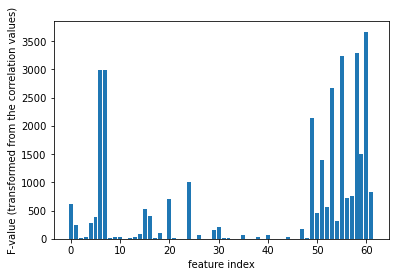

In [12]:

# Plot the scores for the features
plt.bar([i for i in range(len(f_selector.scores_))], f_selector.scores_)
plt.xlabel("feature index")
plt.ylabel("F-value (transformed from the correlation values)")
plt.show()

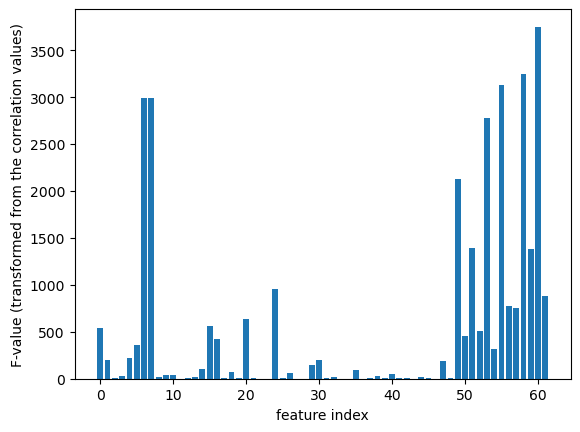

In [150]:

# Plot the scores for the features
plt.bar([i for i in range(len(f_selector.scores_))], f_selector.scores_)
plt.xlabel("feature index")
plt.ylabel("F-value (transformed from the correlation values)")
plt.show()

In [37]:
f_selector.scores_

array([5.69590039e+02, 2.06357908e+02, 1.04122587e+01, 2.74215703e+01,
       2.33241441e+02, 3.59544599e+02, 3.07689261e+03, 3.07689261e+03,
       1.05163292e+01, 2.26122992e+01, 3.10091654e+01, 5.40794795e-01,
       2.40060636e+00, 3.86356156e+01, 9.45581312e+01, 5.45773171e+02,
       4.07075112e+02, 4.22700530e+00, 7.62138511e+01, 9.30677921e-01,
       6.16822228e+02, 6.56027316e+00, 2.81173665e-03, 3.13676389e-01,
       9.17618227e+02, 1.19462262e+00, 6.89016311e+01, 5.77458607e-03,
       1.24095661e+00, 1.38483135e+02, 1.88065345e+02, 1.68668183e+01,
       1.34805561e+01, 2.11706678e-03, 7.44700689e-01, 7.92308815e+01,
       7.32248320e-01, 3.36399681e+00, 2.16194028e+01, 3.62323783e+00,
       5.85615548e+01, 4.30869786e+00, 4.10627318e+00, 3.22675558e-01,
       2.94919497e+01, 1.40608337e+00, 1.35815256e+00, 2.01775599e+02,
       5.94015774e+00, 2.11790191e+03, 5.14529846e+02, 1.32705684e+03,
       5.39153709e+02, 2.74315706e+03, 3.14876967e+02, 3.09233659e+03,
      

In [156]:
f_selector.scores_

array([5.42872350e+02, 2.03389687e+02, 8.48182704e+00, 2.93053154e+01,
       2.23528862e+02, 3.61741998e+02, 2.99456601e+03, 2.99456601e+03,
       1.74204693e+01, 3.62532234e+01, 3.69742904e+01, 7.69150808e-01,
       6.38016754e+00, 2.29856063e+01, 1.08381887e+02, 5.58468564e+02,
       4.23107255e+02, 8.16825664e+00, 7.36685133e+01, 2.38722991e+00,
       6.34824510e+02, 4.67764788e+00, 2.61013026e-03, 3.09691413e-01,
       9.56896093e+02, 2.38666807e+00, 5.83739224e+01, 1.21440269e-01,
                  nan, 1.48659105e+02, 2.00482634e+02, 1.16584485e+01,
       1.84675954e+01, 4.59263188e-02, 5.84519285e-02, 8.76671900e+01,
       4.32638305e-02, 4.05446737e+00, 2.59197466e+01, 6.22392236e+00,
       4.89932435e+01, 2.63512975e+00, 3.67159727e+00, 4.98276755e-01,
       2.29193601e+01, 5.00332491e+00, 4.76868979e-01, 1.87083045e+02,
       6.74983579e+00, 2.13190948e+03, 4.51467079e+02, 1.38924982e+03,
       5.11065549e+02, 2.78330730e+03, 3.16984667e+02, 3.13499463e+03,
      

In [64]:
f_selector.scores_[28]
f_selector.scores_1=[0 if x != x else x for x in f_selector.scores_]

In [65]:
porcentajes=[]
listapca=f_selector.scores_1[:]
maximo=sum(listapca)
for i,pos in enumerate(listapca):
    porcentajes.append(100*pos/maximo)
porcentajes[0]

1.7860766349029111

In [68]:
variables_Validas=[]
index_Validas=[]
for i,pos in enumerate(porcentajes):
    if pos >0.022:
        variables_Validas.append(pos)
        index_Validas.append(i)
#variables_Validas

In [69]:
len(index_Validas)

42

In [70]:
porcentajes[1]

0.6430258332398167

In [71]:
columnas_validas=[]
for i,pos in enumerate(index_Validas):
    columnas_validas.append(X_train.columns.tolist()[pos])

#columnas_validas

In [72]:
X_train[columnas_validas]

,year,mileage,doorCount,numberOfKeys,NºIncidencias,NºRepintadas,transmission Automatic,transmission Manual,Type of Fuel Diesel,Type of Fuel Gasoline,...,Model_Brand_category cheap_brand,Model_Brand_category deep_cheap_brand,Model_Brand_category deep_high_brand,Model_Brand_category high_brand,Model_Brand_category medium_brand,Model_Brand_trimLevel cheap_trimLevel,Model_Brand_trimLevel deep_cheap_trimLevel,Model_Brand_trimLevel deep_trimLevel,Model_Brand_trimLevel high_trimLevel,Model_Brand_trimLevel medium_trimLevel
2868,2021,5646,5,1,5,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1
6306,2020,36753,4,2,30,0,1,0,1,0,...,1,0,0,0,0,1,0,0,0,0
6526,2018,122724,5,2,24,3,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1
8403,2020,13775,5,2,1,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2473,2021,8462,5,2,2,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5159,2021,18585,5,2,15,3,0,1,0,1,...,1,0,0,0,0,0,1,0,0,0
4090,2018,18971,5,2,11,0,1,0,0,1,...,1,0,0,0,0,1,0,0,0,0
4767,2019,11691,5,2,8,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1
4664,2021,1830,5,2,7,0,1,0,0,1,...,1,0,0,0,0,1,0,0,0,0


In [73]:
from sklearn.linear_model import LinearRegression

In [74]:
model_1=LinearRegression().fit(X_train[columnas_validas],Y_train)

In [75]:
predicciones=model_1.predict(X_test[columnas_validas])

In [55]:
1 - ( 1-model_1.score(X, y) ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 )

NameError: name 'X' is not defined

In [76]:
1 - ( 1-model_1.score(X_train[columnas_validas], Y_train) ) * ( len(Y_train) - 1 ) / ( len(Y_train) - X_train[columnas_validas].shape[1] - 1 )

0.8710929002360719

In [57]:
model_1.score(X_train[columnas_validas], Y_train)

0.8732722762066102

In [426]:
1-(1-model_1.score(X_train[columnas_validas], Y_train))*(len(Y_train)-1)/(len(Y_train)-X_train[columnas_validas].shape[1]-1)

0.8722781396609622

In [77]:
import itertools
prediccionesflat=list(itertools.chain.from_iterable(predicciones))
#prediccionesflat

In [78]:
predictions=pd.DataFrame({'Real':Y_test['price'].values.tolist(), 'Predicted':prediccionesflat})
predictions

,Real,Predicted
0,700000.0,692823.819113
1,253000.0,220962.352288
2,288000.0,271895.668083
3,334000.0,270892.100497
4,350000.0,329019.567711
...,...,...
1866,229000.0,307359.123079
1867,270000.0,282936.997740
1868,457000.0,421775.064686
1869,282000.0,285870.666655


In [90]:
X_test.head(1)

,year,mileage,doorCount,numberOfKeys,NºIncidencias,NºRepintadas,transmission Automatic,transmission Manual,Type of Fuel Diesel,Type of Fuel Gasoline,...,Model_Brand_category cheap_brand,Model_Brand_category deep_cheap_brand,Model_Brand_category deep_high_brand,Model_Brand_category high_brand,Model_Brand_category medium_brand,Model_Brand_trimLevel cheap_trimLevel,Model_Brand_trimLevel deep_cheap_trimLevel,Model_Brand_trimLevel deep_trimLevel,Model_Brand_trimLevel high_trimLevel,Model_Brand_trimLevel medium_trimLevel
2263,2020,16495,5,2,0,0,1,0,0,1,...,0,0,0,1,0,0,0,1,0,0


In [102]:
model_1.predict(X_test[columnas_validas].head(1))[0][0]

692823.819112571

In [80]:
from sklearn.metrics import mean_squared_error
import math
mse = mean_squared_error(predictions['Real'], predictions['Predicted'])
rsme=math.sqrt(mse)
# resultado: 0.375
print(round(rsme,3))
predictions['error']=abs(predictions['Real']-predictions['Predicted'])
mae=predictions.error.mean()#MAE
round(mae,3)

44998.772


33854.69

In [102]:

predictions['error']=abs(predictions['Real']-predictions['Predicted'])
mae=predictions.error.mean()#MAE
round(mae,3)

34456.346

In [62]:
predictions.error.mean()/predictions.Real.mean()*100

9.961790086253544

In [63]:
import itertools
prediccionesflat=list(itertools.chain.from_iterable(predicciones))
datosmal=[]
for i,pos in enumerate(prediccionesflat):
    if abs(pos) >1.03734618e+12:
        datosmal.append(i)
listareal=[x for x in list(range(0,len(X_test))) if x not in datosmal]
#listareal
predictions.iloc[listareal].error.mean()

34456.34642495493

In [420]:
predictions.error.mean()

35998.3447276119

In [1076]:
predictions

,Real,Predicted,error
0,249000.0,259907.049677,10907.049677
1,289000.0,295027.591056,6027.591056
2,440000.0,401174.459937,38825.540063
3,713000.0,709660.326573,3339.673427
4,408000.0,403385.625924,4614.374076
...,...,...,...
1866,375000.0,334951.527646,40048.472354
1867,296000.0,289328.279667,6671.720333
1868,312000.0,340786.115144,28786.115144
1869,460000.0,415479.399543,44520.600457


In [364]:
 #Save Model Using joblib
import pandas
from sklearn import model_selection
import joblib

# save the model to disk
filename = 'D:\\Anaconda_en_DiscoD\\TFG\\'+'model3.sav'
joblib.dump(model_1, filename)

# some time later...
 


['D:\\Anaconda_en_DiscoD\\TFG\\model3.sav']

In [365]:
# load the model from disk
filename = 'D:\\Anaconda_en_DiscoD\\TFG\\'+'model3.sav'

loaded_model = joblib.load(filename)
loaded_model.predict(X_test[columnas_validas],)

array([[207649.58637798],
       [439278.27826936],
       [438881.04605998],
       ...,
       [261674.02466541],
       [225516.90438568],
       [379554.9878671 ]])

In [1027]:
loaded_model.predict(X_test)

array([[256610.0470142 ],
       [291644.93567395],
       [407707.575172  ],
       ...,
       [341517.23594926],
       [407706.52113669],
       [287943.037244  ]])

C:\Users\javie\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\javie\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


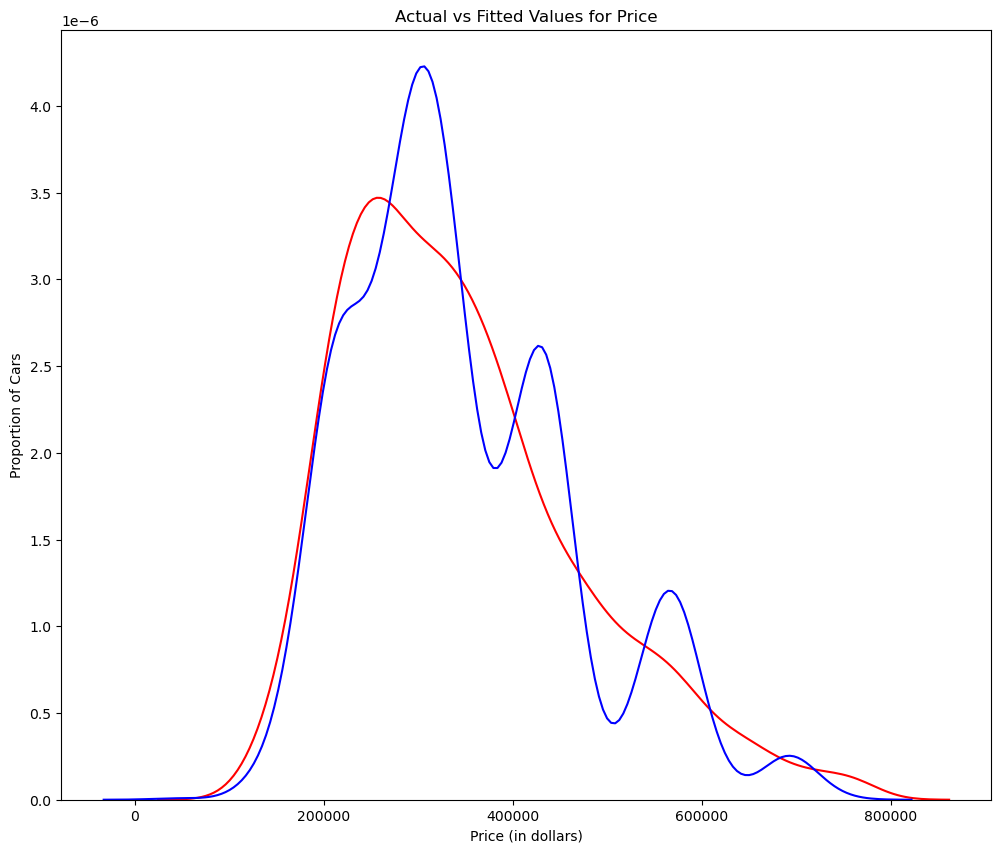

In [64]:
plt.figure(figsize=(12, 10))


ax1 = sns.distplot(predictions['Real'], hist=False, color="r", label="Actual Value")
sns.distplot(predictions['Predicted'], hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [1031]:
loaded_model.coef_

array([[ 8.04071777e+03, -2.15070811e-01, -1.84903040e+03,
        -1.74793331e+03,  6.03423905e+02, -3.56287715e+03,
         1.63884450e+04, -1.63884450e+04,  8.21897507e+03,
        -7.84170589e+03,  3.48107835e+03, -1.41000778e+04,
         1.02417303e+04,  7.40042829e+03,  2.80324608e+03,
        -1.94523980e+04,  9.24872358e+03,  1.19809623e+04,
        -1.29912966e+04,  5.78834550e+03, -1.36072302e+04,
        -8.21050020e+03,  3.71438214e+04, -4.36557457e-11,
        -4.70100072e+03, -5.38931690e+03, -1.00137846e+04,
        -3.18284612e+04, -6.56915600e+04,  5.51926722e+04,
         3.47759212e+04,  7.55142779e+03, -1.00825823e+04,
         1.59975899e+04, -5.91500756e+03, -9.51944443e+04,
        -1.35945695e+05,  1.89023201e+05,  7.30939496e+04,
        -3.09770107e+04, -1.43177374e+04,  6.51454672e+03,
         1.53131531e+03,  3.99229235e+03,  4.15087855e+03,
        -1.87129551e+03, -7.10389074e+02,  2.84849755e+03,
         5.26246502e+03, -9.71823549e+03,  7.70773512e+0

In [419]:
loaded_model.intercept_

array([-15452351.52335566])

### PIPELINE

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

In [25]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False,degree=2)), ('model',Ridge())]

In [26]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', Ridge())])

In [27]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', Ridge())])

In [28]:
pipe.fit(X_train[columnas_validas],Y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', Ridge())])

In [330]:
variables_Validas=[]
index_Validas=[]
for i,pos in enumerate(porcentajes):
    if pos >0.025:
        variables_Validas.append(pos)
        index_Validas.append(i)
variables_Validas
columnas_validas=[]
for i,pos in enumerate(index_Validas):
    columnas_validas.append(X_train.columns.tolist()[pos])

len(columnas_validas)

42

In [111]:
len(listareal)

42

In [32]:
print('The R-square is: ', pipe.score(X_test.iloc[listareal][columnas_validas],Y_test.iloc[listareal]))

The R-square is:  0.8598306241665419


In [33]:
print('The R-square is: ', pipe.score(X_train.iloc[listareal][columnas_validas],Y_train.iloc[listareal]))

The R-square is:  0.8976554420743706


In [30]:
ypipe=pipe.predict(X_test[columnas_validas])

In [337]:
print('The output of the first four predicted value is: ', ypipe[337:346])

The output of the first four predicted value is:  [[382432.]
 [345968.]
 [529472.]
 [235232.]
 [405504.]
 [254656.]
 [281488.]
 [537456.]
 [212576.]]


In [31]:
import itertools
prediccionesflat=list(itertools.chain.from_iterable(ypipe))
datosmal=[]
for i,pos in enumerate(prediccionesflat):
    if abs(pos) >1.03734618e+12:
        datosmal.append(i)
listareal=[x for x in list(range(0,len(X_test))) if x not in datosmal]
#listareal
datosmal

[]

In [37]:
from sklearn.metrics import mean_squared_error
import math
mse = mean_squared_error(predictions.iloc[listareal]['Real'], predictions.iloc[listareal]['Predicted'])
rsme=math.sqrt(mse)
# resultado: 0.375
print(round(rsme,3))
predictions['error']=abs(predictions.iloc[listareal]['Real']-predictions.iloc[listareal]['Predicted'])
mae=predictions.error.mean()#MAE
round(mae,3)

47557.308


34503.387

In [35]:
import itertools
prediccionesflat=list(itertools.chain.from_iterable(ypipe))
prediccionesflat

predictions=pd.DataFrame({'Real':Y_test['price'].values.tolist(), 'Predicted':prediccionesflat})

predictions['error']=abs(predictions['Real']-predictions['Predicted'])
predictions.iloc[listareal].error.mean()

34503.38685073486

In [353]:
predictions.iloc[listareal].error.mean()/predictions.iloc[listareal].Real.mean()*100

9.90624680726848

In [344]:
#menor mse y mayor correlacion significa que es mejor modelo

C:\Users\javie\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\javie\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


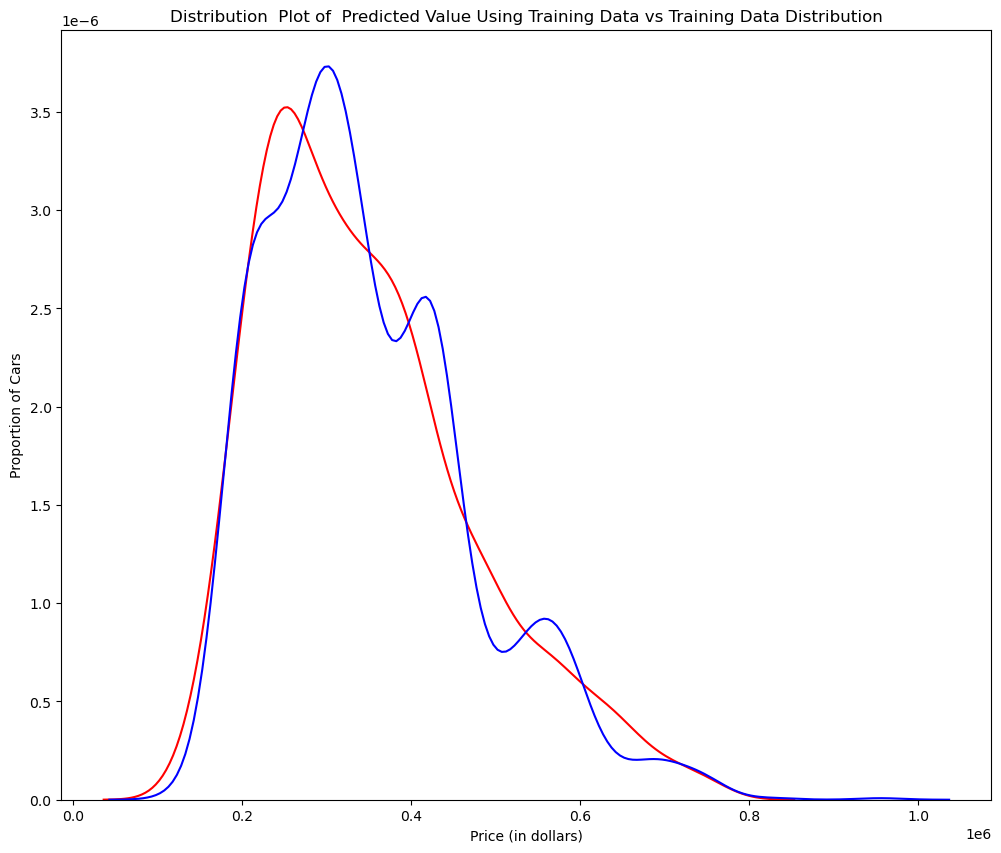

In [41]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(predictions.iloc[listareal]['Real'], predictions.iloc[listareal]['Predicted'], "Actual Values (Train)", "Predicted Values (Train)", Title)

In [40]:
# figure size in inches
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

In [38]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [1265]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

In [427]:
len(columnas_validas)

42

In [428]:
Rsqu_test = []
from sklearn.ensemble import RandomForestClassifier#lo de arriba pero resumido y mehor hecho
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
order = [1, 2, 3, 4]
order = [3,4]
for n in order:
    pipeline = Pipeline([('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False,degree=n)), ('model',Ridge())])
    # import Grid Search class
    
    # make lists of different parameters to check

    parameters2= [{'model__alpha': [0.1,1, 10, 100],'model__normalize':[True,False]} ]
    Grid2 = GridSearchCV(pipeline, parameters2,cv=4)
    Grid2.fit(X_train[columnas_validas],Y_train)
    BestRR2=Grid2.best_estimator_
    #.iloc[listareal]
    Rsqu_test.append(BestRR2.score(X_test[columnas_validas],Y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')   

KeyboardInterrupt: 

In [429]:
Rsqu_test

[0.8710026892686725, 0.8634575074633353]

In [1278]:
variables_Validas=[]
index_Validas=[]
for i,pos in enumerate(porcentajes):
    if pos >1.415:
        variables_Validas.append(pos)
        index_Validas.append(i)
variables_Validas
columnas_validas=[]
for i,pos in enumerate(index_Validas):
    columnas_validas.append(X_train.columns.tolist()[pos])

columnas_validas

['year',
 'transmission Automatic',
 'transmission Manual',
 'driveType2 Front Wheel Drive',
 'bodyType Hatchback',
 'bodyType SUV',
 'Model_Brand_category cheap_brand',
 'Model_Brand_category deep_cheap_brand',
 'Model_Brand_category high_brand',
 'Model_Brand_category medium_brand',
 'make_category cheap_brand',
 'make_category high_brand',
 'make_category medium_brand',
 'Model_Brand_trimLevel cheap_trimLevel',
 'Model_Brand_trimLevel deep_cheap_trimLevel',
 'Model_Brand_trimLevel deep_trimLevel',
 'Model_Brand_trimLevel high_trimLevel',
 'Model_Brand_trimLevel medium_trimLevel']

In [1273]:
from sklearn.model_selection import GridSearchCV
x_data=dfmodel_3.drop('price',axis=1)
y_data = dfmodel_3['price']

In [447]:
pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scale', 'model', 'scale__copy', 'scale__with_mean', 'scale__with_std', 'model__C', 'model__class_weight', 'model__dual', 'model__fit_intercept', 'model__intercept_scaling', 'model__l1_ratio', 'model__max_iter', 'model__multi_class', 'model__n_jobs', 'model__penalty', 'model__random_state', 'model__solver', 'model__tol', 'model__verbose', 'model__warm_start'])

In [42]:
from sklearn.ensemble import RandomForestClassifier#lo de arriba pero resumido y mehor hecho, lassolars el mejor for now, lasso degree 3 parece el mejor
from sklearn.linear_model import Ridge
from sklearn.linear_model import BayesianRidge,LassoLars,MultiTaskElasticNet,ElasticNet,Lasso
from sklearn import linear_model


pipeline = Pipeline([('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False,degree=3)), ('model',Ridge())])
# import Grid Search class
from sklearn.model_selection import GridSearchCV
# make lists of different parameters to checkpoint

parameters2= [{'model__normalize':[True,False]} ]
Grid2 = GridSearchCV(pipeline, parameters2,cv=4)
Grid2.fit(X_train[columnas_validas],Y_train)


GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('polynomial',
                                        PolynomialFeatures(degree=3,
                                                           include_bias=False)),
                                       ('model', Ridge())]),
             param_grid=[{'model__normalize': [True, False]}])

In [43]:
BestRR2=Grid2.best_estimator_
BestRR2.score(X_test[columnas_validas],Y_test)#.iloc[listareal]

0.872262655173887

In [ ]:
import itertools
prediccionesflat=BestRR2.predict(X_test[columnas_validas])
#ypipe=BestRR2.predict(X_test[columnas_validas])
#prediccionesflat=list(itertools.chain.from_iterable(ypipe))

predictions=pd.DataFrame({'Real':Y_test['price'].values.tolist(), 'Predicted':prediccionesflat})

predictions['error']=abs(predictions['Real']-predictions['Predicted'])
print(predictions.error.mean())
predictions.error.mean()/predictions.Real.mean()*100

In [127]:
BestRR2=Grid2.best_estimator_
BestRR2.score(X_train[columnas_validas],Y_train)#.iloc[listareal]

0.9301934237685051

In [128]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(predictions['Real'], predictions['Predicted'])
rsme=math.sqrt(mse)
# resultado: 0.375
print(round(rsme,3))
predictions['error']=abs(predictions['Real']-predictions['Predicted'])
mae=predictions.error.mean()#MAE
round(mae,3)

52543.164


36360.975

In [598]:
BestRR2=Grid2.best_estimator_
BestRR2.score(X_test[columnas_validas],Y_test)#.iloc[listareal]

0.8393273328736761

In [599]:
BestRR2=Grid2.best_estimator_
BestRR2.score(X_train[columnas_validas],Y_train)#.iloc[listareal]

0.931051705893347

In [129]:
import itertools
yhat_test2=BestRR2.predict(X_test[columnas_validas])
#prediccionesflat=list(itertools.chain.from_iterable(yhat_test2))
prediccionesflat=list(yhat_test2)
datosmal1=[]
for i,pos in enumerate(prediccionesflat):
    if abs(pos) >1.03734618e+12:
        datosmal1.append(i)
listareal1=[x for x in list(range(0,len(X_test))) if x not in datosmal]
datosmal1

[]

C:\Users\javie\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\javie\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


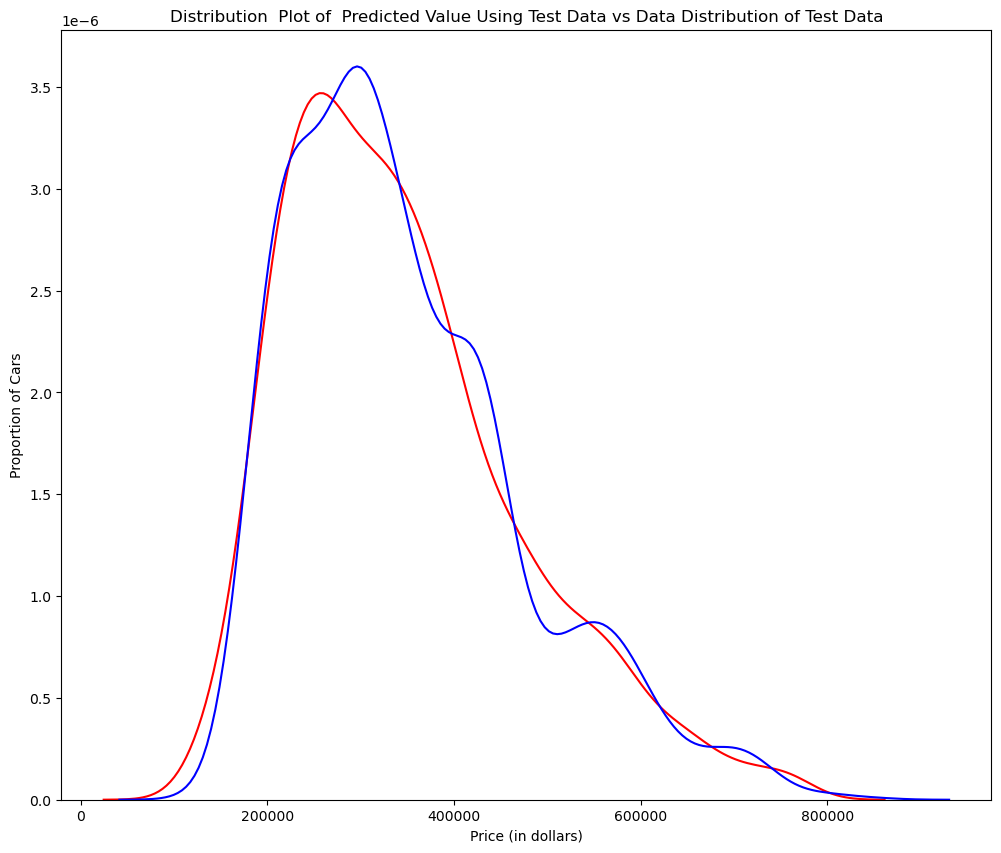

In [130]:
# Write your code below and press Shift+Enter to execute 
yhat_test2=BestRR2.predict(X_test[columnas_validas])
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'

DistributionPlot(Y_test, yhat_test2, "Actual Values (Test)", "Predicted Values (Test)", Title)

C:\Users\javie\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\javie\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


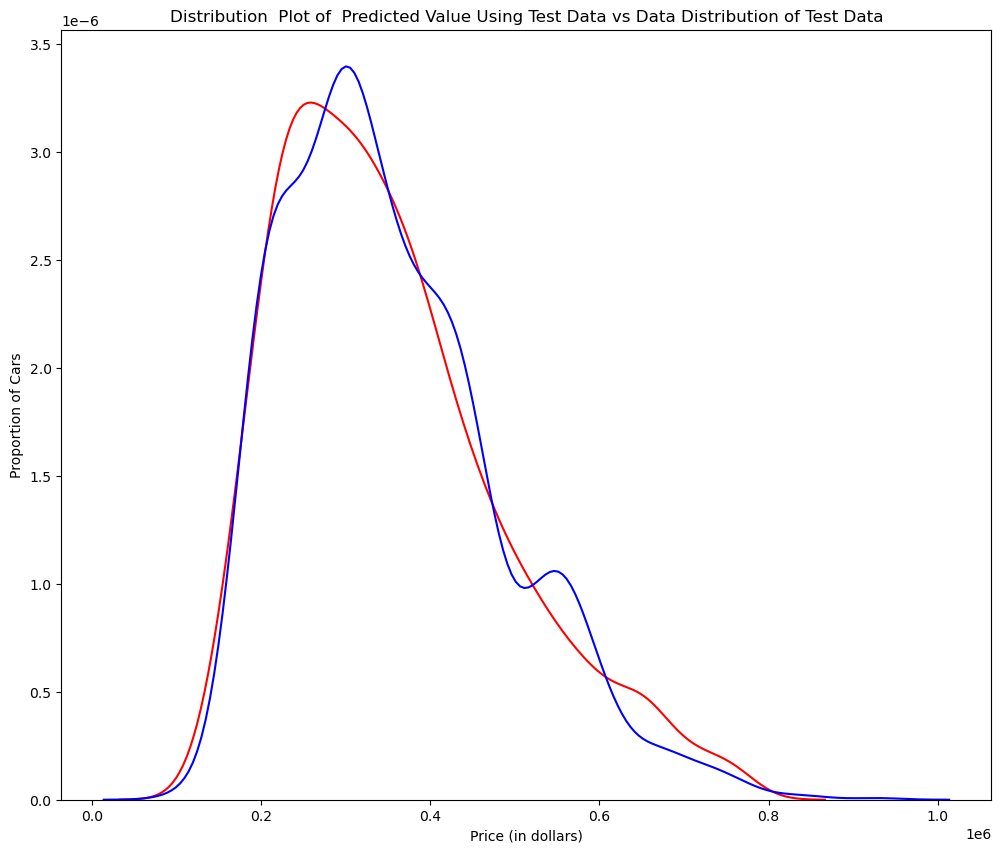

In [601]:
# Write your code below and press Shift+Enter to execute 
yhat_test2=BestRR2.predict(X_test[columnas_validas])
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'

DistributionPlot(Y_test, yhat_test2, "Actual Values (Test)", "Predicted Values (Test)", Title)

C:\Users\javie\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\javie\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


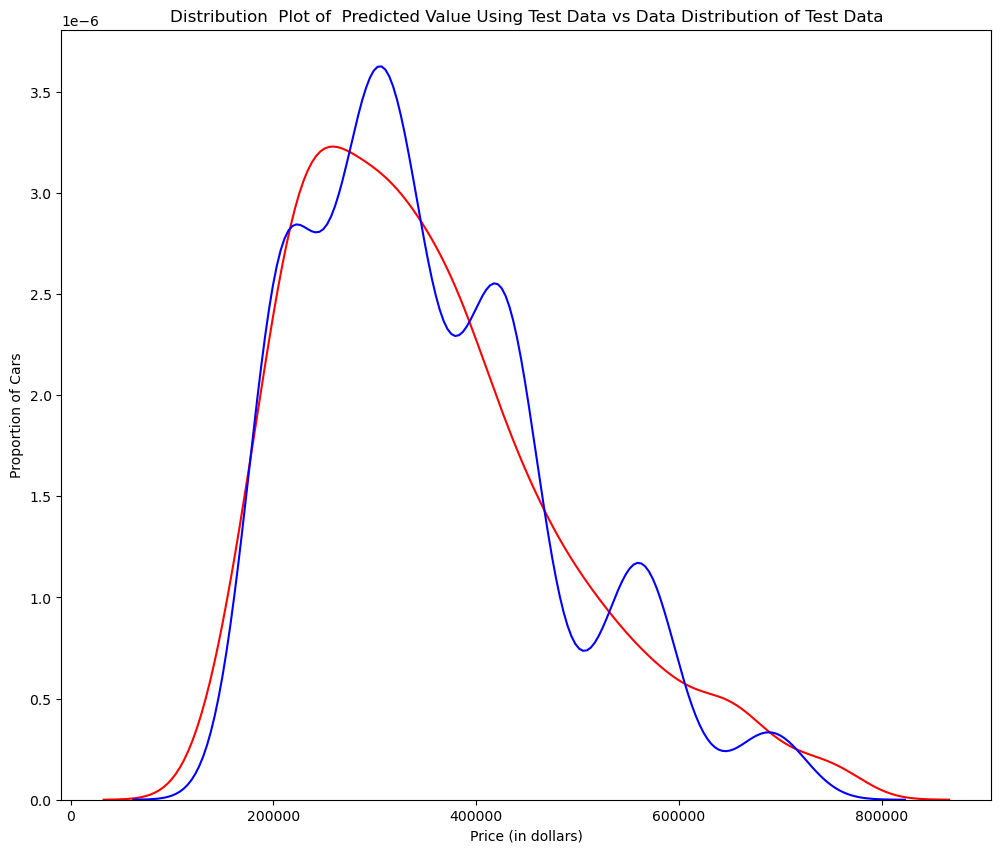

In [473]:
# Write your code below and press Shift+Enter to execute 
yhat_test2=BestRR2.predict(X_test[columnas_validas])
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'

DistributionPlot(Y_test, yhat_test2, "Actual Values (Test)", "Predicted Values (Test)", Title)

C:\Users\javie\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\javie\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


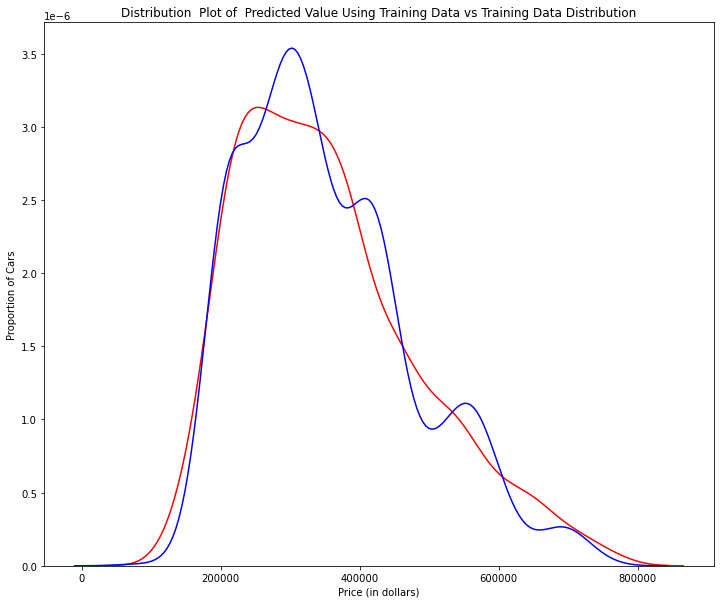

In [1287]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(predictions.iloc[listareal]['Real'], predictions.iloc[listareal]['Predicted'], "Actual Values (Train)", "Predicted Values (Train)", Title)

In [154]:
df[df['transmission']=='Automatic']["Type of Fuel"]#& (df['doorCount']!=5)
df[(df['bodyType']=='Sedan')].groupby(['Type of Fuel']).count()

,price,year,mileage,transmission,driveType2,bodyType,seatingCapacity,doorCount,locationCity,Model_Brand,make,engineVolume,trimLevel,numberOfKeys,numberOfCD
Type of Fuel,,,,,,,,,,,,,,,
Diesel,1203,1203,1203,1203,1203,1203,1203,1203,1203,1203,1203,1203,1203,1203,1203
Gasoline,1914,1914,1914,1914,1914,1914,1914,1914,1914,1914,1914,1914,1914,1914,1914
Hybrid,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37
Liquefied petroleum gas,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15


In [172]:
dfnulo[dfnulo['year']==2010]

,price,year,mileage,transmission,Type of Fuel,driveType2,bodyType,seatingCapacity,doorCount,locationCity,Model_Brand,make,engineVolume,trimLevel,numberOfKeys,numberOfCD
6743,204000.0,2010,76905,Automatic,NaN,Front Wheel Drive,Hatchback,5,5,İstanbul,Ford Fiesta,Ford,1400,1.4 Titanium 96HP,2,1


In [171]:
dfnulo['year'].unique()

array([2020, 2016, 2018, 2021, 2017, 2012, 2015, 2013, 2010, 2014, 2019,
       2011], dtype=int64)

In [158]:
#df[df['transmission']=='Automatic']["Type of Fuel"]#& (df['doorCount']!=5)
df[(df['driveType2']=='Four Wheel Drive')].groupby(['Type of Fuel']).count()

,price,year,mileage,transmission,driveType2,bodyType,seatingCapacity,doorCount,locationCity,Model_Brand,make,engineVolume,trimLevel,numberOfKeys,numberOfCD
Type of Fuel,,,,,,,,,,,,,,,
Diesel,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84
Gasoline,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143
Hybrid,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Liquefied petroleum gas,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [159]:
#df[df['transmission']=='Automatic']["Type of Fuel"]#& (df['doorCount']!=5)
df[(df['driveType2']=='Front Wheel Drive')].groupby(['Type of Fuel']).count()

,price,year,mileage,transmission,driveType2,bodyType,seatingCapacity,doorCount,locationCity,Model_Brand,make,engineVolume,trimLevel,numberOfKeys,numberOfCD
Type of Fuel,,,,,,,,,,,,,,,
Diesel,2941,2941,2941,2941,2941,2941,2941,2941,2941,2941,2941,2941,2941,2941,2941
Gasoline,5676,5676,5676,5676,5676,5676,5676,5676,5676,5676,5676,5676,5676,5676,5676
Hybrid,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113
Liquefied petroleum gas,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26


In [110]:
#df=df1.dropna(subset=["price"], axis=0)
#df.head(20)

In [117]:
pp[pp["almacen"].isnull()]

,almacen
5361,NaN
7303,NaN
7340,NaN
8305,NaN
8801,NaN


Text(0, 0.5, 'count')

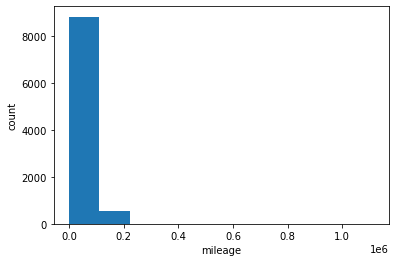

In [693]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(dfnout["mileage"])

# set x/y labels and plot title
plt.pyplot.xlabel("mileage")
plt.pyplot.ylabel("count")

In [749]:
bins = np.linspace(min(dfnout["mileage"]), 174828, 8)
bins

array([1.00000000e+00, 2.49762857e+04, 4.99515714e+04, 7.49268571e+04,
       9.99021429e+04, 1.24877429e+05, 1.49852714e+05, 1.74828000e+05])

In [750]:
bins[7]=1113367
bins

array([1.00000000e+00, 2.49762857e+04, 4.99515714e+04, 7.49268571e+04,
       9.99021429e+04, 1.24877429e+05, 1.49852714e+05, 1.11336700e+06])

In [753]:
bins[1]

24976.285714285714

In [751]:
bins = np.linspace(min(dfnout["mileage"]), 174828, 8)
group_names = ['Deep_Low','Low','Medium_Low','Medium', 'Medium_High', 'High','Deep_High']
dfnout['mileage_binned'] = pd.cut(dfnout["mileage"], bins, labels=group_names, include_lowest=True )


<ipython-input-751-825bae6def1b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfnout['mileage_binned'] = pd.cut(dfnout["mileage"], bins, labels=group_names, include_lowest=True )


In [752]:
dfnout.groupby(['mileage_binned']).size().reset_index(name='counts')

,mileage_binned,counts
0,Deep_Low,3550
1,Low,1892
2,Medium_Low,1576
3,Medium,1286
4,Medium_High,899
5,High,130
6,Deep_High,22


Text(0, 0.5, 'count')

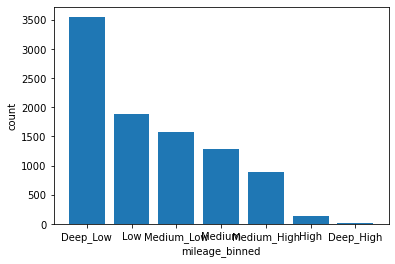

In [758]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, dfnout["mileage_binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("mileage_binned")
plt.pyplot.ylabel("count")


In [9]:
null_columns=df_total.columns[df_total.isnull().any()]#nomnbre de columna con nulos
null_columns

Index(['transmission', 'paintType', 'vatPercentage', 'locationCity',
       'Type of Fuel', 'Fuel type', 'carFeaturesCodes', 'tags', 'Yakıt Tipi'],
      dtype='object')

In [59]:
df_total[df_total["Type of Fuel"].isnull()][['Fuel type','Type of Fuel']]#filas con nulos given a column

In [12]:
df_total["Type of Fuel"].unique()

array(['Diesel', 'Gasoline', 'Hybrid', nan, 'Liquefied petroleum gas'],
      dtype=object)

In [54]:
df_total["fuelType"].unique()

array(['Dizel', 'Benzin', 'Hibrit', '', 'LPG'], dtype=object)

In [66]:
uno=df_total[df_total["Type of Fuel"].isnull()][['Fuel type','Type of Fuel']].index.tolist()#filas con nulos given a column
dos=df_total[df_total["fuelType"]==''].index.tolist()
for i in dos:
    if i not in uno:
        print(i)

5700
8959
9181


In [70]:
df_total.iloc[9181][['Fuel type','Type of Fuel','fuelType']]

Fuel type            NaN
Type of Fuel    Gasoline
fuelType                
Name: 9181, dtype: object

In [13]:
df_total["Fuel type"].unique()

array(['Diesel', 'Petrol', 'LPG', 'Hybrid', nan, 'LPG not registered',
       'Electric', 'Dizel', 'Benzin', 'Benzin/Hybrid'], dtype=object)

In [21]:
df_total[df_total['Fuel type']=='Petrol'][['Fuel type','Type of Fuel']]

,Fuel type,Type of Fuel
1,Petrol,Gasoline
2,Petrol,Gasoline
3,Petrol,Gasoline
7,Petrol,Gasoline
8,Petrol,Gasoline
...,...,...
5494,Petrol,Gasoline
5496,Petrol,Gasoline
5499,Petrol,Gasoline
5504,Petrol,Gasoline


In [14]:
no_iguales=[]
#df_total["driveType2"] = df_total["driveType"].map(Mapping)

for i,pos in enumerate(df_total[['doorCount','Number of doors']].values.tolist()):
    if pos[0]!=int(pos[1]):
        no_iguales.append(i)
len(no_iguales)

0

In [495]:
df_total[df_total['Model_Brand']=="Renault Captur"]

,id,vehiclePurchaseId,status,make,model,price,priceBeforeDiscount,year,vehicleAddedDate,mainImageUrl,...,car_seniority,Model_Brand,driveType2,available,Adde_year,month,Month,Year_month,NºIncidencias,NºRepintadas
40,ae2a1034-0a27-4e3b-b5aa-1041ee5ed2f6,37727,2,Renault,Captur,290000.0,0.0,2021,2021-10-12 13:49:50.060179800,https://dat-tr-prda-ops-vava.azureedge.net/car...,...,1,Renault Captur,Front Wheel Drive,No,2021,10,October,October_2021,2,1
277,74254c85-7340-4f38-b634-48dae77d873a,38994,2,Renault,Captur,207000.0,0.0,2017,2021-10-18 11:12:57.835481900,https://dat-tr-prda-ops-vava.azureedge.net/car...,...,5,Renault Captur,Front Wheel Drive,No,2021,10,October,October_2021,20,0
625,58ace241-3d8b-46b1-a5c0-cce62e2abf73,40507,4,Renault,Captur,212000.0,0.0,2016,2021-10-22 12:56:15.117555300,https://dat-tr-prda-ops-vava.azureedge.net/car...,...,6,Renault Captur,Front Wheel Drive,No,2021,10,October,October_2021,19,1
650,d293bac6-0058-4cee-98e6-46aee75ef1d5,40656,2,Renault,Captur,216000.0,0.0,2016,2021-10-26 15:20:03.704069100,https://dat-tr-prda-ops-vava.azureedge.net/car...,...,6,Renault Captur,Front Wheel Drive,No,2021,10,October,October_2021,20,4
868,4d464c4a-ce0c-4427-a737-d138d32343c2,41634,2,Renault,Captur,238000.0,0.0,2017,2021-11-01 10:37:04.370403800,https://dat-tr-prda-ops-vava.azureedge.net/car...,...,5,Renault Captur,Front Wheel Drive,No,2021,11,November,November_2021,27,1
873,80fb4b21-134b-4d62-accb-883e74272ae6,41646,4,Renault,Captur,351000.0,0.0,2021,2021-11-10 16:11:21.800979000,https://dat-tr-prda-ops-vava.azureedge.net/car...,...,1,Renault Captur,Front Wheel Drive,No,2021,11,November,November_2021,2,0
1151,c37cf08f-1616-4166-b340-2f71c38ba88f,42749,4,Renault,Captur,371000.0,0.0,2021,2021-11-08 13:57:05.146078100,https://dat-tr-prda-ops-vava.azureedge.net/car...,...,1,Renault Captur,Front Wheel Drive,No,2021,11,November,November_2021,0,0
1176,b8ea33bb-d305-4ff9-b5fb-6419b36946eb,42832,2,Renault,Captur,365000.0,0.0,2021,2021-11-03 11:56:20.479811000,https://dat-tr-prda-ops-vava.azureedge.net/car...,...,1,Renault Captur,Front Wheel Drive,No,2021,11,November,November_2021,2,0
1315,0a6dee6f-1b96-4756-a14d-62880f585d9d,43342,2,Renault,Captur,209000.0,0.0,2014,2021-11-11 11:20:06.144819700,https://dat-tr-prda-ops-vava.azureedge.net/car...,...,8,Renault Captur,Front Wheel Drive,No,2021,11,November,November_2021,26,0
1336,2c750153-83d9-4878-9778-688fb3580527,43416,2,Renault,Captur,245000.0,0.0,2017,2021-11-12 12:41:40.258723800,https://dat-tr-prda-ops-vava.azureedge.net/car...,...,5,Renault Captur,Front Wheel Drive,No,2021,11,November,November_2021,34,0


In [502]:
from myfunctions import getting_info_car
link="https://dat-tr-prda-ops-vava.azureedge.net/cars/66681/car-details-en.json"


In [519]:
df1=getting_all_info(link)
df3_1=df1[['marca', 'modelo', 'trimLevel', 'Fecha', 'actualMileage', 'Price','fuelType', 'almacen', 'imgcar', 'bodyType','Wheel drive','transmission']]
HTML(df3_1.to_html(escape=False,formatters=dict(imgcar=path_to_image_html)))

,marca,modelo,trimLevel,Fecha,actualMileage,Price,fuelType,almacen,imgcar,bodyType,Wheel drive,transmission
0,Renault,Captur,0.9 Tce Turbo Start&Stop Icon 90HP,2013-12-04T00:00:00,124268,216000.0,Benzin,Maltepe Warehouse,,SUV,Front Wheel Drive,Manuel


In [504]:
df1.columns

Index(['id', 'vehiclePurchaseId', 'status', 'make', 'model', 'price',
       'priceBeforeDiscount', 'year', 'vehicleAddedDate', 'mainImageUrl',
       'plateNumber', 'mileage', 'transmission', 'transmissionName',
       'fuelType', 'driveType', 'generalComment', 'carFeaturesDescription',
       'bodyType', 'seatingCapacity', 'doorCount', 'trimLevel',
       'engineHorsePower', 'engineType', 'engineVolume', 'engineVolumeLiters',
       'engineNumber', 'vin', 'numberOfKeys', 'numberOfCD', 'color',
       'paintType', 'vatPercentage', 'locationCity', 'unavailable', 'date_x',
       'images', 'imagesExterior', 'imagesInterior', 'imagesImperfections',
       'marca', 'modelo', 'detalles', 'Fecha', 'actualMileage', 'Price',
       'combustible', 'almacen', 'imgcar', 'date_y', 'condittion_summary',
       'Mech_summary', 'Body type', 'Color', 'Number of doors', 'Yakıt Tipi',
       'Wheel drive', 'Transmission', 'Seating capacity', 'features2_summary'],
      dtype='object')

18

In [529]:
#codigo para mostrar imagenes
defin = list(itertools.chain.from_iterable(df1['imagesInterior'].values.tolist()))
dfimg=pd.DataFrame({'Imgs':defin,'Img_type':['Interior']*len(defin)})#la img 3 de abajo matches la 9?
df3_1=dfimg
HTML(df3_1.to_html(escape=False,formatters=dict(Imgs=path_to_image_html)))

,Imgs,Img_type
0,,Interior
1,,Interior
2,,Interior
3,,Interior
4,,Interior
5,,Interior
6,,Interior


In [521]:
df3_1=df1['condittion_summary'][0]
HTML(df3_1.to_html(escape=False,formatters=dict(file_imagen=path_to_image_html)))

,Elemento,Subelemento,nºInspecciones(totales),Orden Inspección,Informe de inspección,Detalle inspección,nºImagenes,file_imagen
0,Hood,Hood,4,1,Scratch,greater than 6 inches / 150mm,1,
1,Hood,Hood,4,2,Dent,less than 4.5 inches/112.5mm,1,
2,Hood,Hood,4,3,Dent with scratch,3 inches/75mm,1,
3,Hood,Hood,4,4,Stone Scratch,Stone Scratch; Yes,1,
4,Front Bumper,Front Shutter,1,1,Damage,Damage; Yes,1,
5,Front Bumper,Front Bumper,2,1,Scratch,3 inches/75mm,2,
6,Front Bumper,Front Bumper,2,2,Chipped,1-5,1,
7,R front light,R front light,1,1,Scratch,3 inches/75mm,1,
8,R front tyre,R front tyre,1,1,Item needs replacing,Item needs replacing; Yes,1,
9,R Front rim,R Front rim,1,1,Scratch,3 inches/75mm,1,


In [514]:
df3_1=df1['features2_summary'][0]
from googletrans import Translator, constants
from pprint import pprint
#chanelazo init the Google API translator df_togroupby.append(df_total.iloc[[g]]['features2_summary'][g].groupby(["component_element"]).size().reset_index(name='Count'))
translator = Translator()
d1=df3_1.groupby(["Detalle"]).size().reset_index(name='Count').sort_values(by=["Count"],ascending=False)
new_detalle=[]
for i,pos in tqdm(enumerate(d1['Detalle'].values.tolist())):
    
    

    translation = translator.translate(pos, src="tr")
    new_detalle.append(translation.text)
d1['New_Detalle']=new_detalle
df3_1["Detalle_Traducido"] = df3_1["Detalle"].map(dict(zip(d1['Detalle'].values.tolist(), d1['New_Detalle'].values.tolist())))
df3_1[['Feature','NºInspecciones','Orden Inspección','Feature Component','Detalle_Traducido','Detalle']]

11it [00:01,  9.77it/s]


,Feature,NºInspecciones,Orden Inspección,Feature Component,Detalle_Traducido,Detalle
0,Exterior equipment,1,1,Exterior equipment,Fog lamp,Sis lambası
1,Exterior equipment,1,1,Exterior equipment,rear parking sensor,Arka park sensörü
2,Interior equipment,3,1,Interior equipment,Navigation,Navigasyon
3,Interior equipment,3,1,Interior equipment,Electronic air conditioning,Elektronik klima
4,Interior equipment,3,1,Interior equipment,Cruise control/limiting,Hız sabitleme/limitleme
5,Interior equipment,3,1,Interior equipment,Keyless start,Anahtarsız çalıştırma
6,Interior equipment,3,2,Climate or Infotainment,Bluetooth,Bluetooth
7,Interior equipment,3,2,Climate or Infotainment,electric air conditioning,Electric airconditioning
8,Interior equipment,3,2,Climate or Infotainment,radio,Radio
9,Interior equipment,3,3,Upholstry fabric,fabric,Fabric


In [ ]:
df3_1['Detalle_Traducido']=new_detalle
df3_1[['Feature','NºInspecciones','Orden Inspección','Feature Component','Detalle','Detalle_Traducido']]

In [531]:
df3_1=df1['Mech_summary'][0]
from googletrans import Translator, constants
from pprint import pprint
#chanelazo init the Google API translator df_togroupby.append(df_total.iloc[[g]]['features2_summary'][g].groupby(["component_element"]).size().reset_index(name='Count'))
translator = Translator()
d1=df3_1.groupby(["Informe de inspección"]).size().reset_index(name='Count').sort_values(by=["Count"],ascending=False)
new_detalle=[]
for i,pos in tqdm(enumerate(d1['Informe de inspección'].values.tolist())):
    
    

    translation = translator.translate(pos, src="tr")
    new_detalle.append(translation.text)
d1['New_Detalle']=new_detalle
df3_1["Informe_Traducido"] = df3_1["Informe de inspección"].map(dict(zip(d1['Informe de inspección'].values.tolist(), d1['New_Detalle'].values.tolist())))

HTML(df3_1.to_html(escape=False,formatters=dict(file_imagen=path_to_image_html)))


14it [00:02,  5.72it/s]


,Elemento,nºInspecciones(totales),Orden Inspección,Informe de inspección,Detalle inspección,nºImagenes,file_imagen,Detalle_Traducido,Informe_Traducido
0,Brakes,1,1,Brakes,Disks are worn,1,,Disks are worn,brakes
1,Steering system,3,1,Direksiyon Simidi,Deforme,1,,deformed,Steering Wheel
2,Steering system,3,2,Torpido / Konsol,Deforme,1,,deformed,Glovebox / Console
3,Steering system,3,3,Vites Topuzu,Deforme,1,,deformed,Gear Knob
4,Locking System,1,1,Spare Key,Yedek Anahtar Var,1,,Have Spare Key,Spare Key
5,Right Front Tyre - Mech,2,1,Right Front Tyre Brand,Diğer,0,,Other,Right Front Tire Brand
6,Right Front Tyre - Mech,2,2,Right Front Tyre Tread Depth,"5,5 - 6,5 mm arası",0,,5.5 - 6.5mm,Right Front Tire Tread Depth
7,Interior Trim,1,1,Deformed,Mevcut,3,,Available,deformed
8,Right Rear Tyre - Mech,2,1,Right Rear Tyre Brand,Diğer,0,,Other,Right Rear Tire Brand
9,Right Rear Tyre - Mech,2,2,Right Rear Tyre Tread Depth,"5,5 - 6,5 mm arası",0,,5.5 - 6.5mm,Right Rear Tire Tread Depth


In [48]:
from googletrans import Translator, constants
from pprint import pprint
# init the Google API translator
translator = Translator()

In [49]:
from googletrans import Translator, constants
from pprint import pprint
# init the Google API translator
translator = Translator()
new_detalle=[]

for i,pos in enumerate(df1['features2_summary'][0]['Detalle']):
    translation = translator.translate(pos, src="tr")
    new_detalle.append(translation.text)
df1['features2_summary'][0]['Detalle']=new_detalle
df1['features2_summary'][0]['component_element']=df1['features2_summary'][0]['Feature Component']+" "+df1['features2_summary'][0]['Detalle']
df1['features2_summary'][0]

,Feature,NºInspecciones,Orden Inspección,Feature Component,Detalle,NºImagen,file_imagen
0,Original Number plates,2,1,Front,Genuine,0,No_hay_Imagen
1,Original Number plates,2,2,Rear,Genuine,0,No_hay_Imagen
2,Exterior equipment,1,1,Exterior equipment,led headlight,0,No_hay_Imagen
3,Exterior equipment,1,1,Exterior equipment,rear parking sensor,0,No_hay_Imagen
4,Exterior equipment,1,1,Exterior equipment,reversing camera,0,No_hay_Imagen
5,Interior equipment,3,1,Interior equipment,Navigation,0,No_hay_Imagen
6,Interior equipment,3,1,Interior equipment,driver assistance systems,0,No_hay_Imagen
7,Interior equipment,3,1,Interior equipment,Sound system,0,No_hay_Imagen
8,Interior equipment,3,1,Interior equipment,Cruise control/limit,0,No_hay_Imagen
9,Interior equipment,3,1,Interior equipment,Armrest (front),0,No_hay_Imagen


In [53]:
df1['features2_summary'][0]['component_element']=df1['features2_summary'][0]['Feature Component']+" "+df1['features2_summary'][0]['Detalle']
df1['features2_summary'][0].groupby(["component_element"]).size().reset_index(name='Count')

,component_element,Count
0,Climate or Infotainment Bluetooth,1
1,Climate or Infotainment DVD screen,1
2,Climate or Infotainment Manual air conditioning,1
3,Climate or Infotainment climate control,1
4,Climate or Infotainment radio,1
5,Exterior equipment led headlight,1
6,Exterior equipment rear parking sensor,1
7,Exterior equipment reversing camera,1
8,Front Genuine,1
9,Interior equipment Armrest (front),1


In [38]:
df['features2_summary'][0]['component_element']=df['features2_summary'][0]['Feature Component']+" "+df['features2_summary'][0]['Detalle']
df['features2_summary'][0].groupby(["component_element"]).size().reset_index(name='Count')

,component_element,Count
0,Climate or Infotainment Manual air conditioning,1
1,Climate or Infotainment climate control,1
2,Front Genuine,1
3,Interior equipment Cruise control/limit,1
4,Interior equipment start/stop,1
5,Paint type Opaque,1
6,Rear Genuine,1
7,Upholstry fabric fabric,1


In [51]:
new_detalle=[]

for i,pos in enumerate(df1['features2_summary'][0]['Detalle']):
    translation = translator.translate(pos, src="tr")
    new_detalle.append(translation.text)
df1['features2_summary'][0]['Detalle']=new_detalle
df1['features2_summary'][0]

ConnectTimeout: timed out

In [ ]:
df = pd.DataFrame({'A': a}, index=[0])#crear el dataframecon dos casos degroupby features, y con ello ver como podria graficarse

In [9]:
import pickle
with open('all_info_37590_70126_V2.head.pkl', 'rb') as inp:
    df_total = pickle.load(inp)
df_total=df_total.reset_index()
del df_total['index']
df_total

,id,vehiclePurchaseId,status,make,model,price,priceBeforeDiscount,year,vehicleAddedDate,mainImageUrl,...,Color,Number of doors,Fuel type,Wheel drive,Transmission,Seating capacity,features2_summary,carFeaturesCodes,tags,Yakıt Tipi
0,3913868a-ac32-48c6-b7d3-496c9ff60900,37590,2,Citroen,C3 AirCross,275000.0,0.0,2021,2021-10-21T15:01:26.9133306+00:00,https://dat-tr-prda-ops-vava.azureedge.net/car...,...,Koyu gri,5,Diesel,Front Wheel Drive,Automatic,5,Feature NºInspecciones Orden I...,NaN,NaN,NaN
0,fd5dbf55-7efb-4a2f-a183-ffa7999452d8,37591,4,Ford,Fiesta,139000.0,0.0,2015,2021-11-02T12:35:56.8062303+00:00,https://dat-tr-prda-ops-vava.azureedge.net/car...,...,Beyaz,5,Petrol,Front Wheel Drive,Manual,5,Empty DataFrame Columns: [] Index: [],NaN,NaN,NaN
0,d6fa506f-18ca-444c-af9a-4cdd104a91f3,37595,2,Hyundai,Tucson,279000.0,0.0,2018,2021-10-15T12:06:35.5243609+00:00,https://dat-tr-prda-ops-vava.azureedge.net/car...,...,Diğer,5,Petrol,Front Wheel Drive,Manual,5,Feature NºInspecciones Ord...,NaN,NaN,NaN
0,e512584f-4d98-4320-a3cc-d68b126c836c,37600,4,Renault,Megane,202000.0,0.0,2019,2021-10-19T12:08:54.5858517+00:00,https://dat-tr-prda-ops-vava.azureedge.net/car...,...,Diğer,5,Petrol,Front Wheel Drive,Manual,5,Feature NºInspecciones Or...,NaN,NaN,NaN
0,0b728ef5-1aa4-4d68-b863-fd2add77cd23,37607,4,Toyota,Corolla,232000.0,0.0,2017,2021-11-02T12:38:30.8740448+00:00,https://dat-tr-prda-ops-vava.azureedge.net/car...,...,Beyaz,4,Diesel,Front Wheel Drive,Automatic,5,Feature NºInspecciones Or...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0bf673d9-81d4-4598-96fa-0fdb805e40bf,70070,4,Mercedes-Benz,C,636000.0,636000.0,2016,2022-03-21T11:01:22.724692+00:00,https://dat-tr-prda-ops-vava.azureedge.net/car...,...,Koyu gri,4,NaN,Rear Wheel Drive,Automatic,5,Feature NºInspecciones Orden Inspección Fe...,NaN,NaN,Benzin
0,683abf4e-f402-453e-86ae-73c1ab1ed060,70075,1,Renault,Megane,317000.0,317000.0,2016,2022-03-24T10:07:54.2101583+00:00,https://dat-tr-prda-ops-vava.azureedge.net/car...,...,Beyaz,5,NaN,Front Wheel Drive,Manual,5,Feature NºInspecciones Orden ...,NaN,NaN,Dizel
0,375569ef-94ae-4f67-afca-1b831e5a3ea0,70079,4,Nissan,Qashqai,519000.0,519000.0,2020,2022-03-21T11:01:33.9017581+00:00,https://dat-tr-prda-ops-vava.azureedge.net/car...,...,Açık gri,5,NaN,Four Wheel Drive,Automatic,5,Feature NºInspecciones Orden Inspección Fe...,NaN,NaN,Dizel
0,afcb7025-da77-4d85-b8b7-1a173eb22697,70081,1,Renault,Symbol,182000.0,182000.0,2015,2022-03-28T13:55:28.1270244+00:00,https://dat-tr-prda-ops-vava.azureedge.net/car...,...,Beyaz,5,NaN,Front Wheel Drive,Manual,5,Feature NºInspecciones Ord...,NaN,NaN,Benzin


In [10]:
df_total=df_total.reset_index()
del df_total['index']
df_total

,id,vehiclePurchaseId,status,make,model,price,priceBeforeDiscount,year,vehicleAddedDate,mainImageUrl,...,Color,Number of doors,Fuel type,Wheel drive,Transmission,Seating capacity,features2_summary,carFeaturesCodes,tags,Yakıt Tipi
0,3913868a-ac32-48c6-b7d3-496c9ff60900,37590,2,Citroen,C3 AirCross,275000.0,0.0,2021,2021-10-21T15:01:26.9133306+00:00,https://dat-tr-prda-ops-vava.azureedge.net/car...,...,Koyu gri,5,Diesel,Front Wheel Drive,Automatic,5,Feature NºInspecciones Orden I...,NaN,NaN,NaN
1,fd5dbf55-7efb-4a2f-a183-ffa7999452d8,37591,4,Ford,Fiesta,139000.0,0.0,2015,2021-11-02T12:35:56.8062303+00:00,https://dat-tr-prda-ops-vava.azureedge.net/car...,...,Beyaz,5,Petrol,Front Wheel Drive,Manual,5,Empty DataFrame Columns: [] Index: [],NaN,NaN,NaN
2,d6fa506f-18ca-444c-af9a-4cdd104a91f3,37595,2,Hyundai,Tucson,279000.0,0.0,2018,2021-10-15T12:06:35.5243609+00:00,https://dat-tr-prda-ops-vava.azureedge.net/car...,...,Diğer,5,Petrol,Front Wheel Drive,Manual,5,Feature NºInspecciones Ord...,NaN,NaN,NaN
3,e512584f-4d98-4320-a3cc-d68b126c836c,37600,4,Renault,Megane,202000.0,0.0,2019,2021-10-19T12:08:54.5858517+00:00,https://dat-tr-prda-ops-vava.azureedge.net/car...,...,Diğer,5,Petrol,Front Wheel Drive,Manual,5,Feature NºInspecciones Or...,NaN,NaN,NaN
4,0b728ef5-1aa4-4d68-b863-fd2add77cd23,37607,4,Toyota,Corolla,232000.0,0.0,2017,2021-11-02T12:38:30.8740448+00:00,https://dat-tr-prda-ops-vava.azureedge.net/car...,...,Beyaz,4,Diesel,Front Wheel Drive,Automatic,5,Feature NºInspecciones Or...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9530,0bf673d9-81d4-4598-96fa-0fdb805e40bf,70070,4,Mercedes-Benz,C,636000.0,636000.0,2016,2022-03-21T11:01:22.724692+00:00,https://dat-tr-prda-ops-vava.azureedge.net/car...,...,Koyu gri,4,NaN,Rear Wheel Drive,Automatic,5,Feature NºInspecciones Orden Inspección Fe...,NaN,NaN,Benzin
9531,683abf4e-f402-453e-86ae-73c1ab1ed060,70075,1,Renault,Megane,317000.0,317000.0,2016,2022-03-24T10:07:54.2101583+00:00,https://dat-tr-prda-ops-vava.azureedge.net/car...,...,Beyaz,5,NaN,Front Wheel Drive,Manual,5,Feature NºInspecciones Orden ...,NaN,NaN,Dizel
9532,375569ef-94ae-4f67-afca-1b831e5a3ea0,70079,4,Nissan,Qashqai,519000.0,519000.0,2020,2022-03-21T11:01:33.9017581+00:00,https://dat-tr-prda-ops-vava.azureedge.net/car...,...,Açık gri,5,NaN,Four Wheel Drive,Automatic,5,Feature NºInspecciones Orden Inspección Fe...,NaN,NaN,Dizel
9533,afcb7025-da77-4d85-b8b7-1a173eb22697,70081,1,Renault,Symbol,182000.0,182000.0,2015,2022-03-28T13:55:28.1270244+00:00,https://dat-tr-prda-ops-vava.azureedge.net/car...,...,Beyaz,5,NaN,Front Wheel Drive,Manual,5,Feature NºInspecciones Ord...,NaN,NaN,Benzin


In [20]:
g=6
df_total.iloc[[g]]['features2_summary'][g].groupby(["Detalle"]).size().reset_index(name='Count')

,Feature,NºInspecciones,Orden Inspección,Feature Component,Detalle,NºImagen,file_imagen
0,Colour,1,1,Paint type,Metalik,0,No_hay_Imagen


In [98]:
s=[]
toap=[]
for g in range(len(df_total)):
    if not df_total.iloc[[g]]['features2_summary'][g].empty:

        y=df_total.iloc[[g]]['features2_summary'][g].groupby(["Detalle"]).size().reset_index(name='Count')
        for i,pos in enumerate(y.values.tolist()):
            
            if pos[0] in ['Arka park sensörü']:
                s.append(g)
        toap.append(y)

In [99]:
d=pd.concat(toap)
d.groupby(["Detalle"]).size().reset_index(name='Count').sort_values(by=["Count"],ascending=False)

,Detalle,Count
44,Opak,4896
3,Arka park sensörü,4830
53,Radio,4752
20,Genuine,4618
19,Fabric,4564
...,...,...
18,Evet,3
12,Duplicate,2
37,Missing,1
6,Broken,1


In [101]:
from googletrans import Translator, constants
from pprint import pprint
# init the Google API translator df_togroupby.append(df_total.iloc[[g]]['features2_summary'][g].groupby(["component_element"]).size().reset_index(name='Count'))
translator = Translator()
d1=d.groupby(["Detalle"]).size().reset_index(name='Count').sort_values(by=["Count"],ascending=False)
new_detalle=[]
for i,pos in tqdm(enumerate(d1['Detalle'].values.tolist())):
    
    

    translation = translator.translate(pos, src="tr")
    new_detalle.append(translation.text)
d1['New_Detalle']=new_detalle
d1

65it [00:15,  4.31it/s]


,Detalle,Count,New_Detalle
44,Opak,4896,Opaque
3,Arka park sensörü,4830,rear parking sensor
53,Radio,4752,radio
20,Genuine,4618,Genuine
19,Fabric,4564,fabric
...,...,...,...
18,Evet,3,Yup
12,Duplicate,2,duplicate
37,Missing,1,Missing
6,Broken,1,Broken


In [107]:
df_total.groupby(["paintType"]).size().reset_index(name='Count').sort_values(by=["Count"],ascending=False)

,paintType,Count
2,Opak,4896
1,Metalik,3677
3,Sedef,364
4,İki renk,85
0,Mat,1


In [87]:
s=[]
pp=[]
uniqus=[]
for g in range(len(df_total)):
    if not df_total.iloc[[g]]['features2_summary'][g].empty:

        y=df_total.iloc[[g]]['features2_summary'][g].groupby(["Detalle"]).size().reset_index(name='Count')
        for i,pos in enumerate(y.values.tolist()):
            
            if pos[1]>1:
                pp.append(y)
                

                uniqus.append(pos[0])
                if pos[0] not in ['Genuine']:
                    s.append(g)
            

In [90]:
g=4089
df_total.iloc[[g]]['features2_summary'][g]


,Feature,NºInspecciones,Orden Inspección,Feature Component,Detalle,NºImagen,file_imagen
0,Original Number plates,2,1,Front,Genuine,0,No_hay_Imagen
1,Original Number plates,2,2,Rear,Genuine,0,No_hay_Imagen
2,Exterior equipment,1,1,Exterior equipment,Led far,0,No_hay_Imagen
3,Exterior equipment,1,1,Exterior equipment,Sis lambası,0,No_hay_Imagen
4,Exterior equipment,1,1,Exterior equipment,Arka park sensörü,0,No_hay_Imagen
5,Exterior equipment,1,1,Exterior equipment,Geri görüş kamerası,0,No_hay_Imagen
6,Interior equipment,3,1,Interior equipment,Hız sabitleme/limitleme,0,No_hay_Imagen
7,Interior equipment,3,1,Interior equipment,Kol dayama (ön),0,No_hay_Imagen
8,Interior equipment,3,1,Interior equipment,Anahtarsız giriş,0,No_hay_Imagen
9,Interior equipment,3,1,Interior equipment,Anahtarsız çalıştırma,0,No_hay_Imagen


In [77]:
df_total.iloc[[g]]['features2_summary'][g]

,Feature,NºInspecciones,Orden Inspección,Feature Component,Detalle,NºImagen,file_imagen
0,Colour,1,1,Paint type,Metalik,0,No_hay_Imagen


In [78]:
import numpy as np
 
# function to get unique values
def unique(list1):
    x = np.array(list1)
    print(np.unique(x))
     
 

unique(uniqus)

['Duplicate' 'Genuine' 'Hayır' 'Missing']


In [45]:
df_total.iloc[[g-55]]['features2_summary'][g-55]['Detalle'].values.tolist()

['Led far',
 'Sunroof',
 'Ön park sensörü',
 'Arka park sensörü',
 'Isıtmalı ön koltuklar',
 'Elektronik klima',
 'Sürücü destek sistemleri',
 'Elektrikli sürücü koltuğu',
 'Elektrikli yolcu koltuğu',
 'Hız sabitleme/limitleme',
 'Kol dayama (ön)',
 'Kol dayama (arka)',
 'Start/stop',
 'Climate control',
 'Radio',
 'Partial leather',
 'Opak']

In [28]:
df_togroupby=[]
df_togroupby2=[]
df_togroupby_=[]
df_togroupby_2=[]
for g in tqdm(range(len(df_total))):

    if not df_total.iloc[[g]]['features2_summary'][g].empty:
    
        for i,pos in enumerate(df_total.iloc[[g]]['features2_summary'][g]['Detalle']):        
            df_togroupby.append(df_total.iloc[[g]]['features2_summary'][g].groupby(["Detalle"]).size().reset_index(name='Count'))
            df_togroupby_.append(g)
        for i,pos in enumerate(df_total.iloc[[g]]['features2_summary'][g]['Feature Component']):        
            df_togroupby2.append(df_total.iloc[[g]]['features2_summary'][g].groupby(["Feature Component"]).size().reset_index(name='Count'))
            df_togroupby_2.append(g)
            



100%|██████████████████████████████████████████████████████████████████████████████| 9535/9535 [06:52<00:00, 23.11it/s]


In [91]:
dfgp

,Detalle,Count
0,Bluetooth,1
1,Climate control,1
2,Fabric,1
3,Hız sabitleme/limitleme,1
4,Opak,1
...,...,...
4,Genuine,2
5,Manual airconditioing,1
6,Opak,1
7,Radio,1


In [37]:
from googletrans import Translator, constants
from pprint import pprint
# init the Google API translator df_togroupby.append(df_total.iloc[[g]]['features2_summary'][g].groupby(["component_element"]).size().reset_index(name='Count'))
translator = Translator()
df_gp=dfgp.groupby(["Detalle"]).size().reset_index(name='Count')
new_detalle=[]
for i,pos in tqdm(enumerate(df_gp['Detalle'].values.tolist())):
    
    

    translation = translator.translate(pos, src="tr")
    new_detalle.append(translation.text)
df_gp['New_Detalle']=new_detalle
df_gp

65it [00:15,  4.13it/s]


,Detalle,Count,New_Detalle
0,360 derece kamera sistemi,1951,360 degree camera system
1,Anahtarsız giriş,18936,keyless entry
2,Anahtarsız çalıştırma,32498,Keyless start
3,Arka park sensörü,69540,rear parking sensor
4,Arka yolcular için klima,12718,Air conditioning for rear passengers
...,...,...,...
60,Unknown,460,Unknown
61,Vakumlu kapı,834,vacuum door
62,Xenon far,14754,xenon headlight
63,Ön park sensörü,35999,front parking sensor


In [38]:
df_gp[['New_Detalle']].groupby(["New_Detalle"]).size().reset_index(name='Count')

,New_Detalle,Count
0,360 degree camera system,1
1,Air conditioning for rear passengers,1
2,Armrest (front),1
3,Armrest (rear),1
4,Automatic opening tailgate,1
...,...,...
60,rear parking sensor,1
61,reversing camera,1
62,start/stop,1
63,vacuum door,1


In [47]:
dfgp

,Detalle,Count
0,Bluetooth,1
1,Climate control,1
2,Fabric,1
3,Hız sabitleme/limitleme,1
4,Opak,1
...,...,...
4,Genuine,2
5,Manual airconditioing,1
6,Opak,1
7,Radio,1


In [34]:
#dfgp=pd.concat(df_togroupby)#unir dataframes side by side
dfgp.groupby(["Detalle"]).size().reset_index(name='Count')

,Detalle,Count
0,360 derece kamera sistemi,1951
1,Anahtarsız giriş,18936
2,Anahtarsız çalıştırma,32498
3,Arka park sensörü,69540
4,Arka yolcular için klima,12718
...,...,...
60,Unknown,460
61,Vakumlu kapı,834
62,Xenon far,14754
63,Ön park sensörü,35999


In [33]:
dfgp2=pd.concat(df_togroupby2)#unir dataframes side by side
dfgp2

,Feature Component,Count
0,Climate or Infotainment,3
1,Exterior equipment,2
2,Interior equipment,1
3,Paint type,1
4,Upholstry fabric,1
...,...,...
2,Front,1
3,Paint type,1
4,Rear,1
5,Upholstry fabric,1


In [60]:
dfp=pd.concat([df['features2_summary'][0].groupby(["component_element"]).size().reset_index(name='Count'),df1['features2_summary'][0].groupby(["component_element"]).size().reset_index(name='Count')], axis=0)#unir dataframes side by side
dfp.groupby(["component_element"]).size().reset_index(name='Count')

,component_element,Count
0,Climate or Infotainment Bluetooth,1
1,Climate or Infotainment DVD screen,1
2,Climate or Infotainment Manual air conditioning,2
3,Climate or Infotainment climate control,2
4,Climate or Infotainment radio,1
5,Exterior equipment led headlight,1
6,Exterior equipment rear parking sensor,1
7,Exterior equipment reversing camera,1
8,Front Genuine,2
9,Interior equipment Armrest (front),1


In [111]:
df_total.iloc[[2]][['make', 'model', 'price','date_x','date_y','mileage', 'transmission','fuelType','bodyType', 'seatingCapacity', 'doorCount', 'trimLevel','Wheel drive','engineVolumeLiters','numberOfKeys', 'numberOfCD', 'color','paintType', 'locationCity', 'unavailable']]

,make,model,price,date_x,date_y,mileage,transmission,fuelType,bodyType,seatingCapacity,doorCount,trimLevel,Wheel drive,engineVolumeLiters,numberOfKeys,numberOfCD,color,paintType,locationCity,unavailable
2,Hyundai,Tucson,279000.0,2021-10-15 12:06:35.524360900,2019-08-26,32351,Manuel,Benzin,SUV,5,5,1.6 Gdi 4x2 Style 132HP,Front Wheel Drive,1.6,2,1,Other,Metalik,İstanbul,True


In [73]:
df1[['engineHorsePower', 'engineType', 'engineVolume', 'engineVolumeLiters','engineNumber', 'vin', 'numberOfKeys', 'numberOfCD', 'color','paintType', 'vatPercentage', 'locationCity', 'unavailable']]

,engineHorsePower,engineType,engineVolume,engineVolumeLiters,engineNumber,vin,numberOfKeys,numberOfCD,color,paintType,vatPercentage,locationCity,unavailable
0,0,,1600,1.6,G4FPMZ092861,TMAJB81BGMJ100307,2,1,Dark blue,Metalik,0.0,Ankara,True


In [76]:
df1[['marca', 'modelo', 'detalles', 'Fecha', 'actualMileage', 'Price','combustible', 'almacen', 'imgcar', 'date_y','Wheel drive']]

,marca,modelo,detalles,Fecha,actualMileage,Price,combustible,almacen,imgcar,date_y,Wheel drive
0,Hyundai,Tucson,1.6 T-GDI 4x2 Comfort Dct 180HP,2021-12-04T00:00:00,1933,587000.0,Benzin,Ankara Warehouse,https://prvtrprdaopsvava.blob.core.windows.net...,2021-12-04,Front Wheel Drive


In [62]:
df1.columns

Index(['id', 'vehiclePurchaseId', 'status', 'make', 'model', 'price',
       'priceBeforeDiscount', 'year', 'vehicleAddedDate', 'mainImageUrl',
       'plateNumber', 'mileage', 'transmission', 'transmissionName',
       'fuelType', 'driveType', 'generalComment', 'carFeaturesDescription',
       'bodyType', 'seatingCapacity', 'doorCount', 'trimLevel',
       'engineHorsePower', 'engineType', 'engineVolume', 'engineVolumeLiters',
       'engineNumber', 'vin', 'numberOfKeys', 'numberOfCD', 'color',
       'paintType', 'vatPercentage', 'locationCity', 'unavailable', 'date_x',
       'images', 'imagesExterior', 'imagesInterior', 'imagesImperfections',
       'marca', 'modelo', 'detalles', 'Fecha', 'actualMileage', 'Price',
       'combustible', 'almacen', 'imgcar', 'date_y', 'condittion_summary',
       'Mech_summary', 'Body type', 'Color', 'Number of doors', 'Fuel type',
       'Wheel drive', 'Transmission', 'Seating capacity', 'features2_summary'],
      dtype='object')

In [1]:
df1.columns

NameError: name 'df1' is not defined

In [74]:
print(df1[['vehicleAddedDate','date_x','date_y','Fecha']].dtypes)
df1[['vehicleAddedDate','date_x','date_y','Fecha']]

vehicleAddedDate            object
date_x              datetime64[ns]
date_y              datetime64[ns]
Fecha                       object
dtype: object


,vehicleAddedDate,date_x,date_y,Fecha
0,2021-12-29T14:32:44.3739515+00:00,2021-12-29 14:32:44.373951500,2021-12-04,2021-12-04T00:00:00


In [25]:
# specify source language
translation = translator.translate("Kol dayama (ön)", src="tr")
print(f"{translation.origin} ({translation.src}) --> {translation.text} ({translation.dest})")

Kol dayama (ön) (tr) --> Armrest (front) (en)


In [22]:
translation.text

"How's it going ?"

In [29]:
# translate a spanish text to arabic for instance
translation = translator.translate("Kol dayama (ön)", dest="es")
print(f"{translation.origin} ({translation.src}) --> {translation.text} ({translation.dest})")

Kol dayama (ön) (tr) --> Reposabrazos (delantero) (es)
